# Temperature Forecast Project

## Dataset Description
This dataset is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

## Attributes Description:
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

## Objective:
The objective of this project is to predict minimum temperature and maximum temperature for the next day based on the details provided in the dataset. In this project, the prediction of next day minimum and maximum temperature involves the implementation of two separate regression models.

## Features and Target variable for Next-Day Minimum Temperature Prediction:

### Features: 
station, Date, Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, lat, lon, DEM, Slope, Solar radiation, Next_Tmax

### Target variable:
Next_Tmin

## Features and Target variable for Next-Day Maximum Temperature Prediction:

### Features: 
station, Date, Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, lat, lon, DEM, Slope, Solar radiation, Next_Tmin

### Target variable:
Next_Tmax

# Importing Libraries

In [1]:
# Numerical computation and data manipulation 
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Z-score normalization and Box-Cox transformation
from scipy.stats import zscore, yeojohnson, boxcox

# Suppress warnings
import warnings 
warnings.filterwarnings('ignore')

# Data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# K-Nearest Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor

# Decision Tree regression
from sklearn.tree import DecisionTreeRegressor

# Support Vector Regression
from sklearn.svm import SVR

# Ensemble algorithms
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor, 
BaggingRegressor)

# XGBoost for boosting
import xgboost as xgb

# Metrics for checking the performance of models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Data splitting and validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Saving and loading models
import joblib

# Importing dataset

In [2]:
# Load data from CSV into DataFrame
df = pd.read_csv('Temperature_Forecast_Dataset.csv')

In [3]:
# Display first 5 rows of the dataframe
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [4]:
# Display last 5 rows of the dataframe
df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

# Exploratory Data Analysis

In [5]:
# Display shape of the dataframe
df.shape

(7752, 25)

Dataframe has 7752 rows and 25 columns.

In [6]:
# Display the names of the columns 
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [7]:
# Display the datatype of each column
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Except 'Date' column all the columns have float datatype but datatype for 'Date' column should be datetime not object. 

In [8]:
# Converting datatype of 'Date' column to datetime datatype
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
# Again checking the datatype for each column
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

In [10]:
# Checking for if any whitespace,'?' 'NA' or '-' present in the dataset
df.isin([' ','NA','-','?']).sum().any()

False

No whitespace,'?' 'NA' or '-' present in the dataset.

In [11]:
# Checking for the duplicated rows in the dataset
df.duplicated().sum()

0

No duplicated rows present in the dataset.

In [12]:
# Checking for the null values in the dataset
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Yes null values are present in the dataset.

In [13]:
# Calculate the percentage of missing data for each column
missing_percentage = (df.isnull().mean() * 100).round(2)

# Create a DataFrame to display the results
missing_data_info = pd.DataFrame({'Missing Values': df.isnull().sum(), '% Missing Data': missing_percentage})

# Sort the missing data information in descending order by '% Missing Data'
missing_data_info = missing_data_info.sort_values(by = '% Missing Data', ascending = False)

# Print the sorted missing data information
print(missing_data_info)

                  Missing Values  % Missing Data
LDAPS_CC3                     75            0.97
LDAPS_PPT4                    75            0.97
LDAPS_PPT2                    75            0.97
LDAPS_PPT1                    75            0.97
LDAPS_CC4                     75            0.97
LDAPS_CC2                     75            0.97
LDAPS_CC1                     75            0.97
LDAPS_LH                      75            0.97
LDAPS_WS                      75            0.97
LDAPS_Tmin_lapse              75            0.97
LDAPS_Tmax_lapse              75            0.97
LDAPS_RHmax                   75            0.97
LDAPS_RHmin                   75            0.97
LDAPS_PPT3                    75            0.97
Present_Tmin                  70            0.90
Present_Tmax                  70            0.90
Next_Tmax                     27            0.35
Next_Tmin                     27            0.35
Date                           2            0.03
station             

The table presents information on missing values and their respective percentage of missing data for each feature in the dataset. Notably, most features have a very low percentage of missing data, with the majority of them having less than 1 percent missing values. Features like LDAPS_CC3, LDAPS_PPT4, LDAPS_PPT2, LDAPS_PPT1, LDAPS_CC4, LDAPS_CC2, LDAPS_CC1, LDAPS_LH, LDAPS_WS, LDAPS_Tmin_lapse, LDAPS_Tmax_lapse, LDAPS_RHmax, LDAPS_RHmin, and LDAPS_PPT3 all have less than 1 percent (0.97%) of missing data.

Additionally, features like Present_Tmin and Present_Tmax also have lower percentage of missing data, all have less than 1 percent (0.90%) of missing data. Finally, features including Next_Tmax, Next_Tmin, Date, and station have a very minimal percentage of missing data, each accounting for just 0.03 percent. Some features, such as lat, lon, DEM, Slope, and Solar radiation, have no missing values, signifying that these attributes are complete in the dataset.

The 'Date' and 'station' columns each have only two missing values, leading to remove rows containing null values in these columns.

In [14]:
# Dropping rows containg null values from 'Date' and 'station' columns
df.dropna(subset = ['Date', 'station'], inplace = True)

## Imputing Missing Values 

In [15]:
# Imputing columns containing null values with mean
columns_to_impute = ['LDAPS_CC3', 'LDAPS_PPT4', 'LDAPS_PPT2', 'LDAPS_PPT1', 'LDAPS_CC4', 'LDAPS_CC2', 'LDAPS_CC1', 'LDAPS_LH', 
                     'LDAPS_WS', 'LDAPS_Tmin_lapse', 'LDAPS_Tmax_lapse', 'LDAPS_RHmax', 'LDAPS_RHmin', 'LDAPS_PPT3', 
                     'Present_Tmin', 'Present_Tmax', 'Next_Tmax', 'Next_Tmin']

for i in columns_to_impute:
    df[i].fillna(df[i].mean(), inplace = True)

In [16]:
# Again checking for the null values
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Now, no null values present in the dataset.

In [17]:
# Extracting year, month, and day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

The year, month, and day have been extracted from the 'Date' column, making it redundant to keep in the dataset.

In [18]:
# Dropping 'Date' column from the dataset
df.drop('Date', inplace = True, axis=1)

In [19]:
# Display the dataset after updation
df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

       lat      lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  \
0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1       21.2   
1  37.6046  127.032   44.7624  0.5141      5869.312500       30.5       22.5   
2  37.5776  127.058   33.3068  0.2661      5863.555664       31.1       23.9   
3  37.6450  127.022   45.7160  2.5348      5856.964844       31.7       24.3   
4  37.5507  127.135   35.0380  0.5055      5859.552246       31.2       22.5   

   Year  Month  Day  
0  2013      6   30  
1  2013      6   30  
2  2013      6   30  
3  2013      6   30  
4  2013      6   30  

[5 rows x 27 columns]

In [20]:
# Checking for the number of unique values present inside each column
df.nunique()

station               25
Present_Tmax         168
Present_Tmin         156
LDAPS_RHmin         7673
LDAPS_RHmax         7665
LDAPS_Tmax_lapse    7676
LDAPS_Tmin_lapse    7676
LDAPS_WS            7676
LDAPS_LH            7676
LDAPS_CC1           7570
LDAPS_CC2           7583
LDAPS_CC3           7600
LDAPS_CC4           7525
LDAPS_PPT1          2813
LDAPS_PPT2          2511
LDAPS_PPT3          2357
LDAPS_PPT4          1919
lat                   12
lon                   25
DEM                   25
Slope                 25
Solar radiation     1575
Next_Tmax            184
Next_Tmin            158
Year                   5
Month                 12
Day                   21
dtype: int64

For 'station,' there are 25 unique values, indicating 25 different weather monitoring stations in the dataset.

'Date' has 310 unique values, suggesting data collected over time.

'Present_Tmax' has 167 unique values, representing a range of maximum temperatures in the current time period.

'Present_Tmin' has 155 unique values, indicating a range of minimum temperatures in the current time period.

Columns like 'LDAPS_RHmin' 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS' and 'LDAPS_LH' exhibit a high number of unique values (e.g., 7675), reflecting a broad range of humidity, temperature, wind speed, and latent heat observations.

Columns such as 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3' and 'LDAPS_CC4' demonstrate relatively high numbers of unique values (e.g., 7569 to 7599), implying various cloud cover fraction measurements.

'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3' and 'LDAPS_PPT4' have fewer unique values (e.g., 1918 to 2812), indicating precipitation values with a smaller range of variation compared to other meteorological columns.

'lat', 'lon', 'DEM', 'Slope' and 'Solar radiation' show fewer unique values (e.g., 12 to 25), suggesting that these attributes might represent geographic or topographic information with limited variation within the dataset.

'Next_Tmax' and 'Next_Tmin' have 183 and 157 unique values, respectively, representing the range of predicted maximum and minimum temperatures for the next time period.

In [21]:
# Display unique values present inside each numerical column
for i in df.columns:
    print(i, ":")
    print(df[i].unique())
    print("\n")

station :
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25.]


Present_Tmax :
[28.7        31.9        31.6        32.         31.4        32.1
 31.7        31.3        32.5        30.7        32.8        30.9
 32.2        32.7        31.5        28.3        30.5        30.3
 31.         30.8        30.         30.6        30.1        29.9
 31.8        24.4        27.         28.         27.7        27.8
 28.8        27.6        26.9        27.5        28.6        26.2
 28.4        26.7        29.         26.6        27.1        28.1
 27.9        28.5        30.4        29.1        28.9        29.4
 31.1        29.5        29.6        24.9        28.2        26.1
 27.2        26.5        27.4        30.2        32.4        29.3
 29.8        33.5        29.2        29.7        25.9        23.1
 24.8        26.3        26.8        25.8        25.3        25.1
 24.5        25.4        26.         25.6        26.4        29.76846354
 27.3

Each column contains a wide array of distinct and diverse values.

In [22]:
# Display value count for each unique value present in the numerical column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64


31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
21.2      1
20.1      1
36.4      1
20.3      1
20.0      1
Name: Present_Tmax, Length: 168, dtype: int64


24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
29.7      1
29.6      1
14.3      1
29.9      1
15.0      1
Name: Present_Tmin, Length: 156, dtype: int64


56.758747    75
71.658089     2
77.030350     2
51.810596     2
39.882526     1
             ..
52.924568     1
60.215191     1
46.799820     1
52.227486     1
22.933014     1
Name: LDAPS_RHmin, Length: 7673, dtype: int64


88.377125    75
88.938194     2
99.251968     2
92.531029     2
96.525200     2
      

The occurrence pattern of values in each column displays a wide and diverse array of distinct values.

In [23]:
# Display dataframe's details, such as columns' data type and no. of non_null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7750 entries, 0 to 7749
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7750 non-null   float64
 2   Present_Tmin      7750 non-null   float64
 3   LDAPS_RHmin       7750 non-null   float64
 4   LDAPS_RHmax       7750 non-null   float64
 5   LDAPS_Tmax_lapse  7750 non-null   float64
 6   LDAPS_Tmin_lapse  7750 non-null   float64
 7   LDAPS_WS          7750 non-null   float64
 8   LDAPS_LH          7750 non-null   float64
 9   LDAPS_CC1         7750 non-null   float64
 10  LDAPS_CC2         7750 non-null   float64
 11  LDAPS_CC3         7750 non-null   float64
 12  LDAPS_CC4         7750 non-null   float64
 13  LDAPS_PPT1        7750 non-null   float64
 14  LDAPS_PPT2        7750 non-null   float64
 15  LDAPS_PPT3        7750 non-null   float64
 16  LDAPS_PPT4        7750 non-null   float64


In [24]:
# Display summary statistics of the dataframe
df.describe().T

count         mean         std          min          25%  \
station           7750.0    13.000000    7.211568     1.000000     7.000000   
Present_Tmax      7750.0    29.768464    2.953516    20.000000    27.800000   
Present_Tmin      7750.0    23.225742    2.398327    11.300000    21.700000   
LDAPS_RHmin       7750.0    56.758747   14.585101    19.794666    46.048225   
LDAPS_RHmax       7750.0    88.377125    7.149011    58.936283    84.318649   
LDAPS_Tmax_lapse  7750.0    29.613845    2.928357    17.624954    27.693733   
LDAPS_Tmin_lapse  7750.0    23.512997    2.330881    14.272646    22.115268   
LDAPS_WS          7750.0     7.096501    2.166519     2.882580     5.686498   
LDAPS_LH          7750.0    62.495273   33.516382   -13.603212    37.547426   
LDAPS_CC1         7750.0     0.368744    0.261096     0.000000     0.148339   
LDAPS_CC2         7750.0     0.356047    0.256717     0.000000     0.142424   
LDAPS_CC3         7750.0     0.318359    0.249039     0.000000     0.103113   
LDAPS_CC4         7750.0     0.299142    0.253007     0.000000     0.082777   
LDAPS_PPT1        7750.0     0.589061    1.918691     0.000000     0.000000   
LDAPS_PPT2        7750.0     0.482312    1.737965     0.000000     0.000000   
LDAPS_PPT3        7750.0     0.276208    1.142722     0.000000     0.000000   
LDAPS_PPT4        7750.0     0.267307    1.185994     0.000000     0.000000   
lat               7750.0    37.544720    0.050335    37.456200    37.510200   
lon               7750.0   126.991400    0.079406   126.826000   126.937000   
DEM               7750.0    61.854944   54.256953    12.370000    28.700000   
Slope             7750.0     1.256692    1.369833     0.098500     0.271300   
Solar radiation   7750.0  5341.549330  428.996445  4329.520508  4999.018555   
Next_Tmax         7750.0    30.275437    3.117994    17.400000    28.200000   
Next_Tmin         7750.0    22.932837    2.478851    11.300000    21.400000   
Year              7750.0  2015.000000    1.414305  2013.000000  2014.000000   
Month             7750.0     7.080645    2.238364     1.000000     7.000000   
Day               7750.0    16.370968    8.241331     7.000000     8.000000   

                          50%          75%          max  
station             13.000000    19.000000    25.000000  
Present_Tmax        29.900000    32.000000    37.600000  
Present_Tmin        23.400000    24.875000    29.900000  
LDAPS_RHmin         55.313244    67.032715    98.524734  
LDAPS_RHmax         89.699505    93.703491   100.000153  
LDAPS_Tmax_lapse    29.662273    31.682567    38.542255  
LDAPS_Tmin_lapse    23.735942    25.133460    29.619342  
LDAPS_WS             6.563068     8.005363    21.857621  
LDAPS_LH            57.310630    83.891182   213.414006  
LDAPS_CC1            0.320110     0.571665     0.967277  
LDAPS_CC2            0.315667     0.554910     0.968353  
LDAPS_CC3            0.265264     0.493971     0.983789  
LDAPS_CC4            0.232354     0.497218     0.974710  
LDAPS_PPT1           0.000000     0.067515    23.701544  
LDAPS_PPT2           0.000000     0.024224    21.621661  
LDAPS_PPT3           0.000000     0.009685    15.841235  
LDAPS_PPT4           0.000000     0.000686    16.655469  
lat                 37.550700    37.577600    37.645000  
lon                126.995000   127.042000   127.135000  
DEM                 45.716000    59.832400   212.335000  
Slope                0.618000     1.767800     5.178200  
Solar radiation   5436.345215  5728.316406  5992.895996  
Next_Tmax           30.500000    32.600000    38.900000  
Next_Tmin           23.100000    24.600000    29.800000  
Year              2015.000000  2016.000000  2017.000000  
Month                7.000000     8.000000    12.000000  
Day                 16.000000    24.000000    31.000000

station: The station identifier ranges from 1 to 25, indicating different weather stations. The data appears to be evenly distributed among the stations, with an average station number of 13.

Present_Tmax: The maximum present temperature ranges from 20°C to 37.6°C, with an average around 29.8°C. This suggests a moderate to warm climate.

Present_Tmin: The minimum present temperature ranges from 11.3°C to 29.9°C, with an average around 23.2°C. This indicates mild nighttime temperatures.

LDAPS_RHmin: The minimum relative humidity ranges from approximately 19.8% to 98.5%, with an average around 56.8%. There is a wide variation in humidity levels.

LDAPS_RHmax: The maximum relative humidity ranges from approximately 58.9% to 100%, with an average around 88.4%. Humidity levels are generally high.

LDAPS_Tmax_lapse: The maximum temperature lapse rate ranges from approximately 17.6°C to 38.5°C, with an average around 29.6°C. This is a measure of temperature change with altitude.

LDAPS_Tmin_lapse: The minimum temperature lapse rate ranges from approximately 14.3°C to 29.6°C, with an average around 23.5°C. This is another measure of temperature change with altitude.

LDAPS_WS: The wind speed ranges from approximately 2.9 to 21.9 m/s, with an average of approximately 7.1 m/s. Wind speed varies.

LDAPS_LH: Latent heat flux varies widely, ranging from -13.6 to 213.4 W/m². There are significant variations in energy exchange.

LDAPS_CC1: The cloud cover fraction (CC1) varies from 0 to 0.97, with an average of approximately 0.37. It shows the extent of cloud cover.

LDAPS_CC2: Cloud cover fraction (CC2) ranges from 0 to 0.97, with an average around 0.36.

LDAPS_CC3: Cloud cover fraction (CC3) ranges from 0 to 0.98, with an average of approximately 0.32.

LDAPS_CC4: Cloud cover fraction (CC4) varies from 0 to 0.97, with an average of approximately 0.30.

LDAPS_PPT1: Precipitation varies widely, from 0 to 23.7 mm, with an average of approximately 0.59 mm.

LDAPS_PPT2: Precipitation ranges from 0 to 21.6 mm, with an average around 0.48 mm.

LDAPS_PPT3: Precipitation varies from 0 to 15.8 mm, with an average of approximately 0.28 mm.

LDAPS_PPT4: Precipitation ranges from 0 to 16.7 mm, with an average of approximately 0.27 mm.

lat: Latitude is fairly consistent, with values around 37.54°, suggesting the data covers a relatively small geographical area.

lon: Longitude is centered around 126.99°, indicating a specific region.

DEM: Digital Elevation Model (DEM) values range from approximately 12.4 to 212.3 meters, with an average elevation of about 61.9 meters. The terrain varies.

Slope: Slope values range from 0.1 to 5.2 degrees, with an average slope of about 1.26 degrees. Terrain slope varies.

Solar radiation: Solar radiation ranges from approximately 4329 to 5993 J/m², with an average of approximately 5341.55 J/m². This represents the amount of solar energy received.

Next_Tmax: The maximum temperature prediction for the next day ranges from 17.4°C to 38.9°C, with an average around 30.3°C.

Next_Tmin: The minimum temperature prediction for the next day ranges from 11.3°C to 29.8°C, with an average around 22.9°C.

Year: The data spans years from 2013 to 2017, with an average year of 2015. This indicates a multi-year dataset.

Month: The data covers months from 1 to 12, with an average month of approximately 7.08. This suggests the dataset includes various seasons.

Day: The day of the month ranges from 7 to 31, with an average day of approximately 16.37.

# Data Visualization

In [25]:
sns.set(style = 'whitegrid')

## Univariate Analysis

### Count Plot

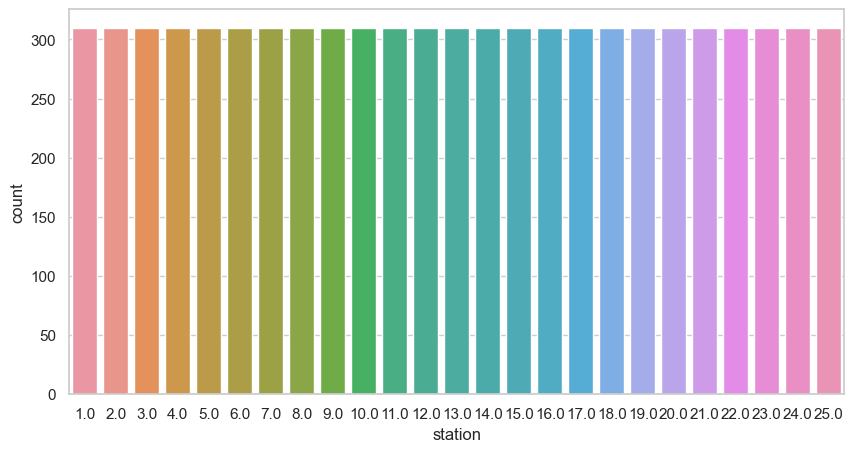

In [26]:
# Univariate analysis using Count plot 
plt.figure(figsize = (10, 5))
sns.countplot(df['station']) 
plt.show()

### Observations:
The frequency counts indicate that the data is evenly distributed across all 26 stations, with each station having exactly 310 occurrences. 

### Histogram

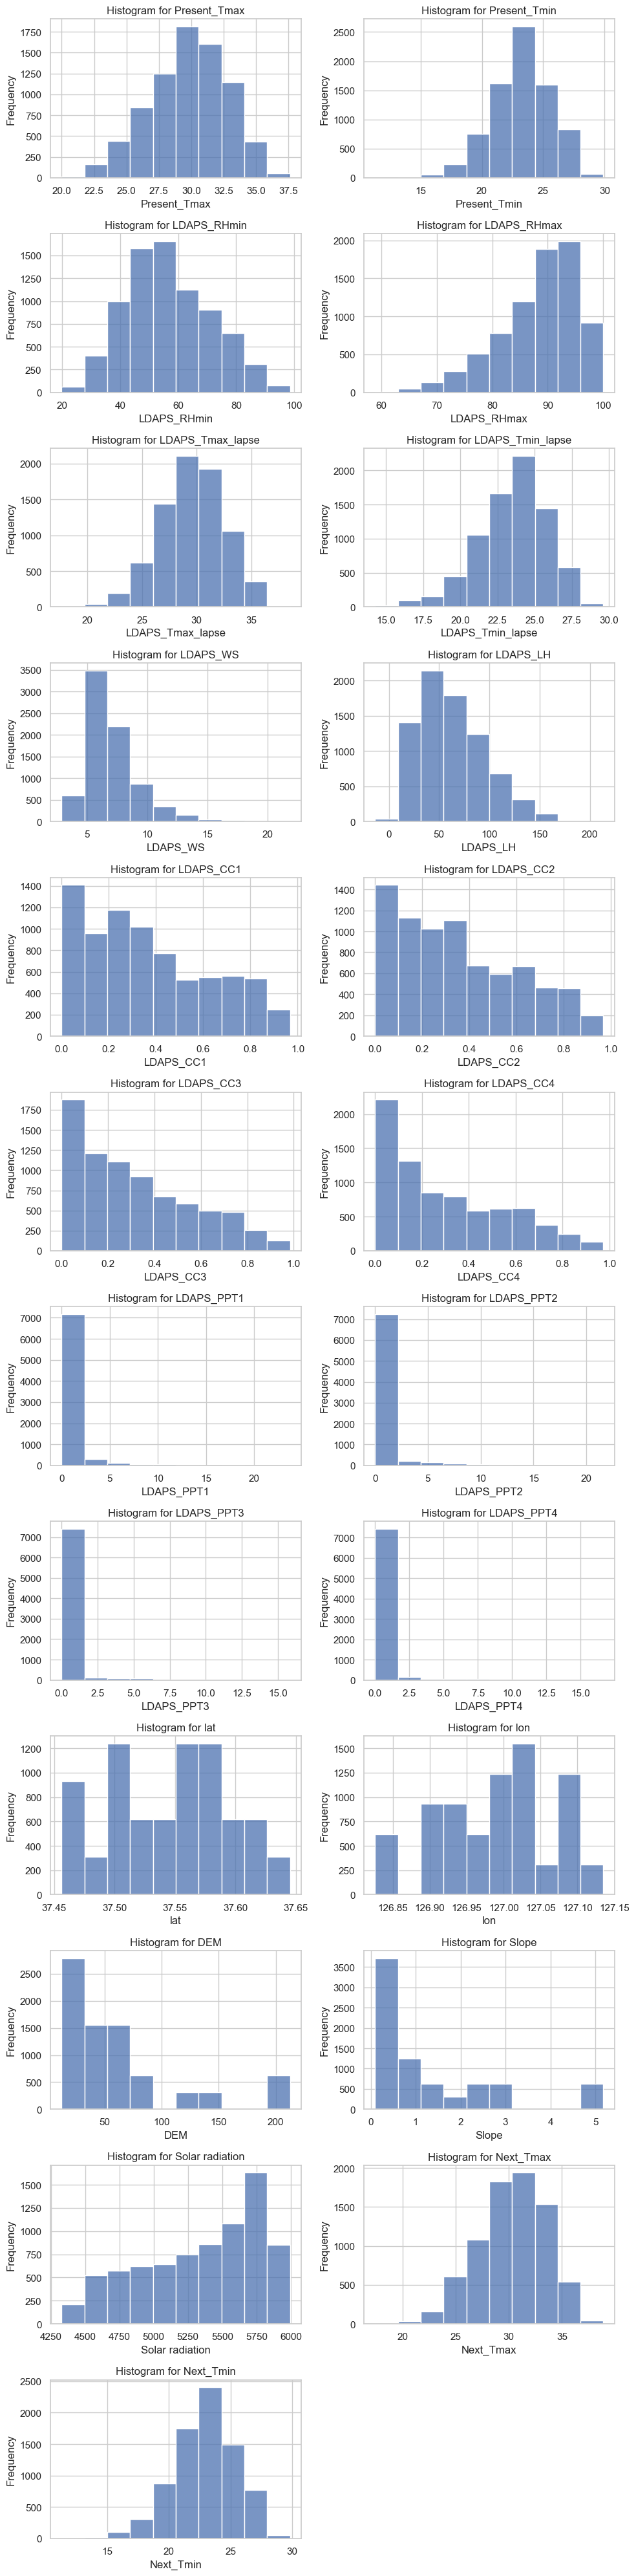

In [27]:
# Univariate analysis using Histogram for numerical columns
columns_to_plot = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax','LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 
                   'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1','LDAPS_PPT2', 
                   'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']
rows = 12
columns = 2

plt.figure(figsize = (10, 40))

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i+1)
    sns.histplot(df[columns_to_plot[i]], bins = 10) 
    plt.title("Histogram for " + columns_to_plot[i])
    plt.ylabel("Frequency")
    plt.tight_layout()

plt.show()

### Observations:

#### Present_Tmax
Slightly left-skewed.
Moderate variability.

#### Present_Tmin
Approximately symmetric.
Low variability.

#### LDAPS_RHmin
Slightly right-skewed.
Moderate variability.

#### LDAPS_RHmax
Slightly left-skewed.
Low variability.

#### LDAPS_Tmax_lapse
Approximately symmetric.
Moderate variability.

#### LDAPS_Tmin_lapse
Approximately symmetric.
Low variability.

#### LDAPS_WS
Right-skewed, with higher values.
Moderate variability.

#### LDAPS_LH
Right-skewed, with high values.
Significant variability.

#### LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4
Right-skewed, values close to 0.
Low variability.

#### LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4
Highly right-skewed, most values close to 0.
Low variability.

#### lat, lon
Very low variability.

#### DEM
Right-skewed.
Considerable variability.

#### Slope
Right-skewed, values close to 0
Moderate variability.

#### Solar radiation
Slightly left-skewed.
Moderate variability.

#### Next_Tmax
Slightly left-skewed.
Moderate variability.

#### Next_Tmin
Approximately symmetric.
Low variability.

### Violin Plot

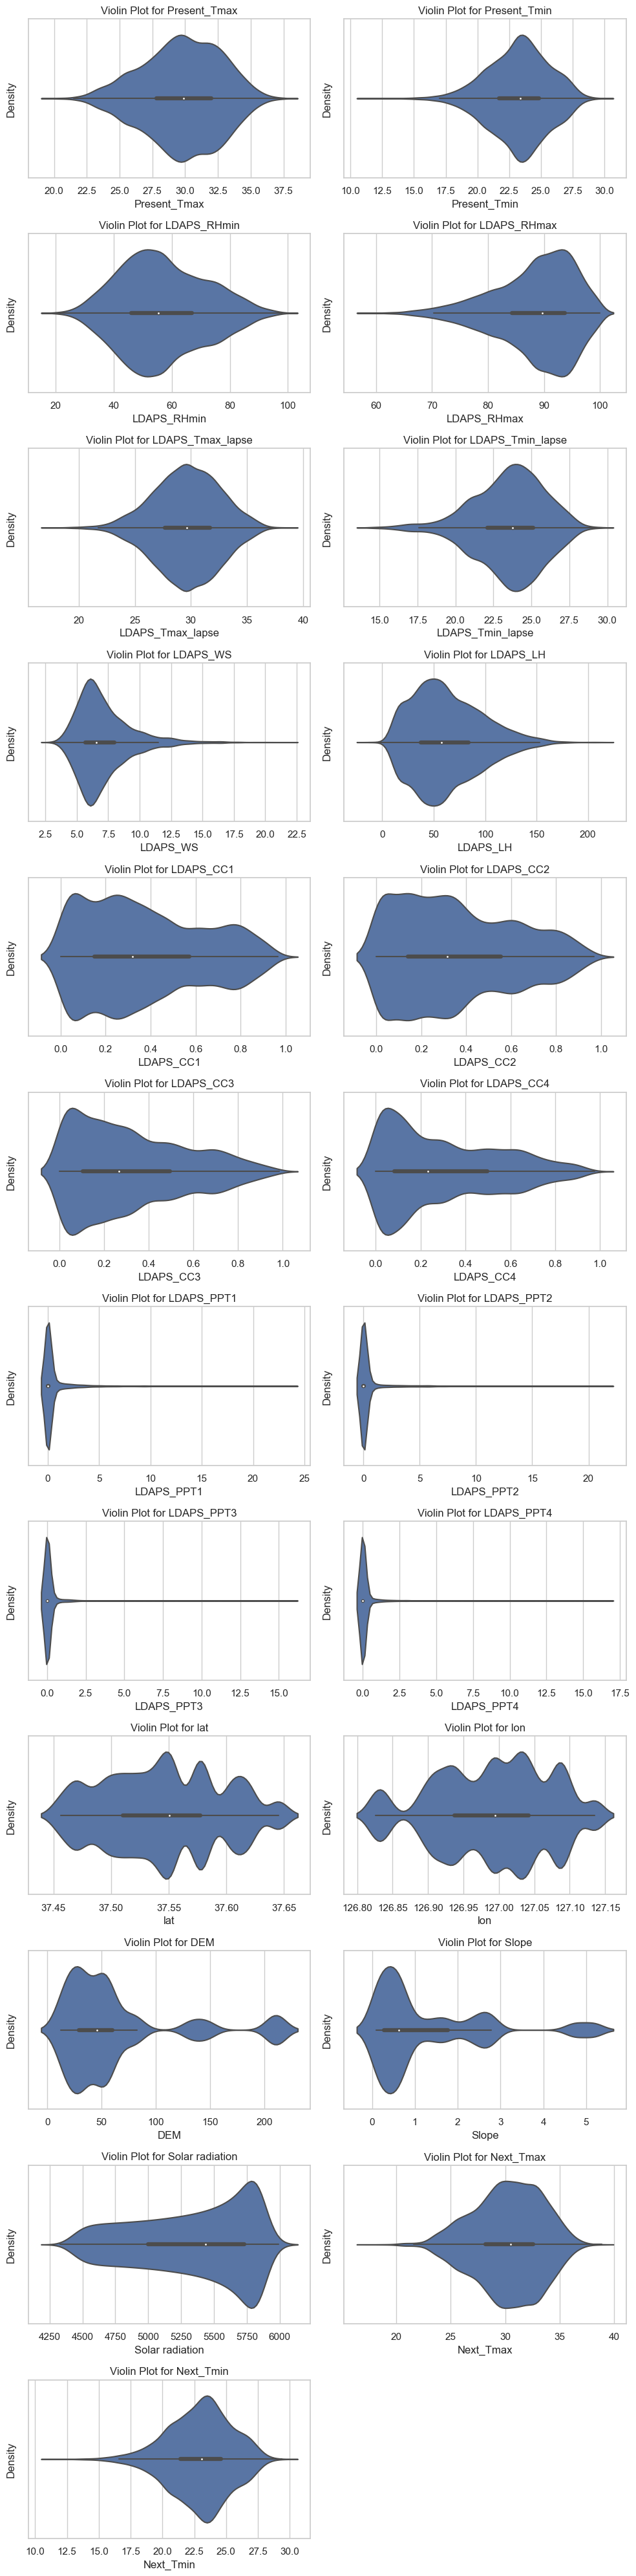

In [28]:
# Columns to plot
columns_to_plot = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 
                   'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 
                   'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 
                   'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']

# Define the number of rows and columns for subplots
rows = 12
columns = 2

# Create a figure with the specified size
plt.figure(figsize=(10, 40))

# Loop through the columns and create violin plots
for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i + 1)
    sns.violinplot(x=df[columns_to_plot[i]])
    plt.title("Violin Plot for " + columns_to_plot[i])
    plt.xlabel(columns_to_plot[i])
    plt.ylabel("Density")
    plt.tight_layout()

plt.show()

### Observations:

#### Present_Tmax
The distribution is slightly left-skewed, with a mean of 29.77 and a median of 29.90.
There is moderate variability, as indicated by a standard deviation of 2.95.

#### Present_Tmin
The distribution is approximately symmetric, with a mean of 23.23 and a median of 23.40.
There is relatively low variability, with a standard deviation of 2.40.

#### LDAPS_RHmin
The distribution is slightly right-skewed, with a mean of 56.76 and a median of 55.31.
There is moderate variability, as indicated by a standard deviation of 14.59.

#### LDAPS_RHmax
The distribution is slightly left-skewed, with a mean of 88.38 and a median of 89.70.
There is relatively low variability, with a standard deviation of 7.15.

#### LDAPS_Tmax_lapse
The distribution is approximately symmetric, with a mean of 29.61 and a median of 29.66.
There is moderate variability, as indicated by a standard deviation of 2.93.

#### LDAPS_Tmin_lapse
The distribution is approximately symmetric, with a mean of 23.51 and a median of 23.74.
There is relatively low variability, with a standard deviation of 2.33.

#### LDAPS_WS
The distribution appears right-skewed, with a mean of 7.10 and a median of 6.56.
There is moderate variability, as indicated by a standard deviation of 2.17.

#### LDAPS_LH
The distribution appears right-skewed, with a mean of 62.50 and a median of 57.31.
There is significant variability, with a high standard deviation of 33.52.

#### LDAPS_CC1 to LDAPS_CC4
These columns have right-skewed distributions with values close to 0.
They exhibit relatively low variability, with standard deviations ranging from 0.25 to 0.26.

#### LDAPS_PPT1 to LDAPS_PPT4
These columns have highly right-skewed distributions with most values at or near 0.
They have relatively low variability, with standard deviations ranging from 1.14 to 1.92.

#### lat and lon
Both columns have very low variability with values concentrated around specific latitude and longitude coordinates.

#### DEM
The distribution is right-skewed with some extreme values.
There is considerable variability in elevation data, as indicated by a standard deviation of 54.26.

#### Slope
The distribution is right-skewed, with values close to 0.
There is moderate variability in slope data, as indicated by a standard deviation of 1.37.

#### Solar radiation
The distribution appears slightly left-skewed, with a mean of 5341.55 and a median of 5436.35.
There is moderate variability in solar radiation values, as indicated by a standard deviation of 429.00.

#### Next_Tmax
The distribution appears slightly left-skewed, with a mean of 30.28 and a median of 30.50.
There is moderate variability, as indicated by a standard deviation of 3.12.

#### Next_Tmin
The distribution is approximately symmetric, with a mean of 22.93 and a median of 23.10.
There is relatively low variability, with a standard deviation of 2.48.

## Bivariate Analysis

### Scatter Plot

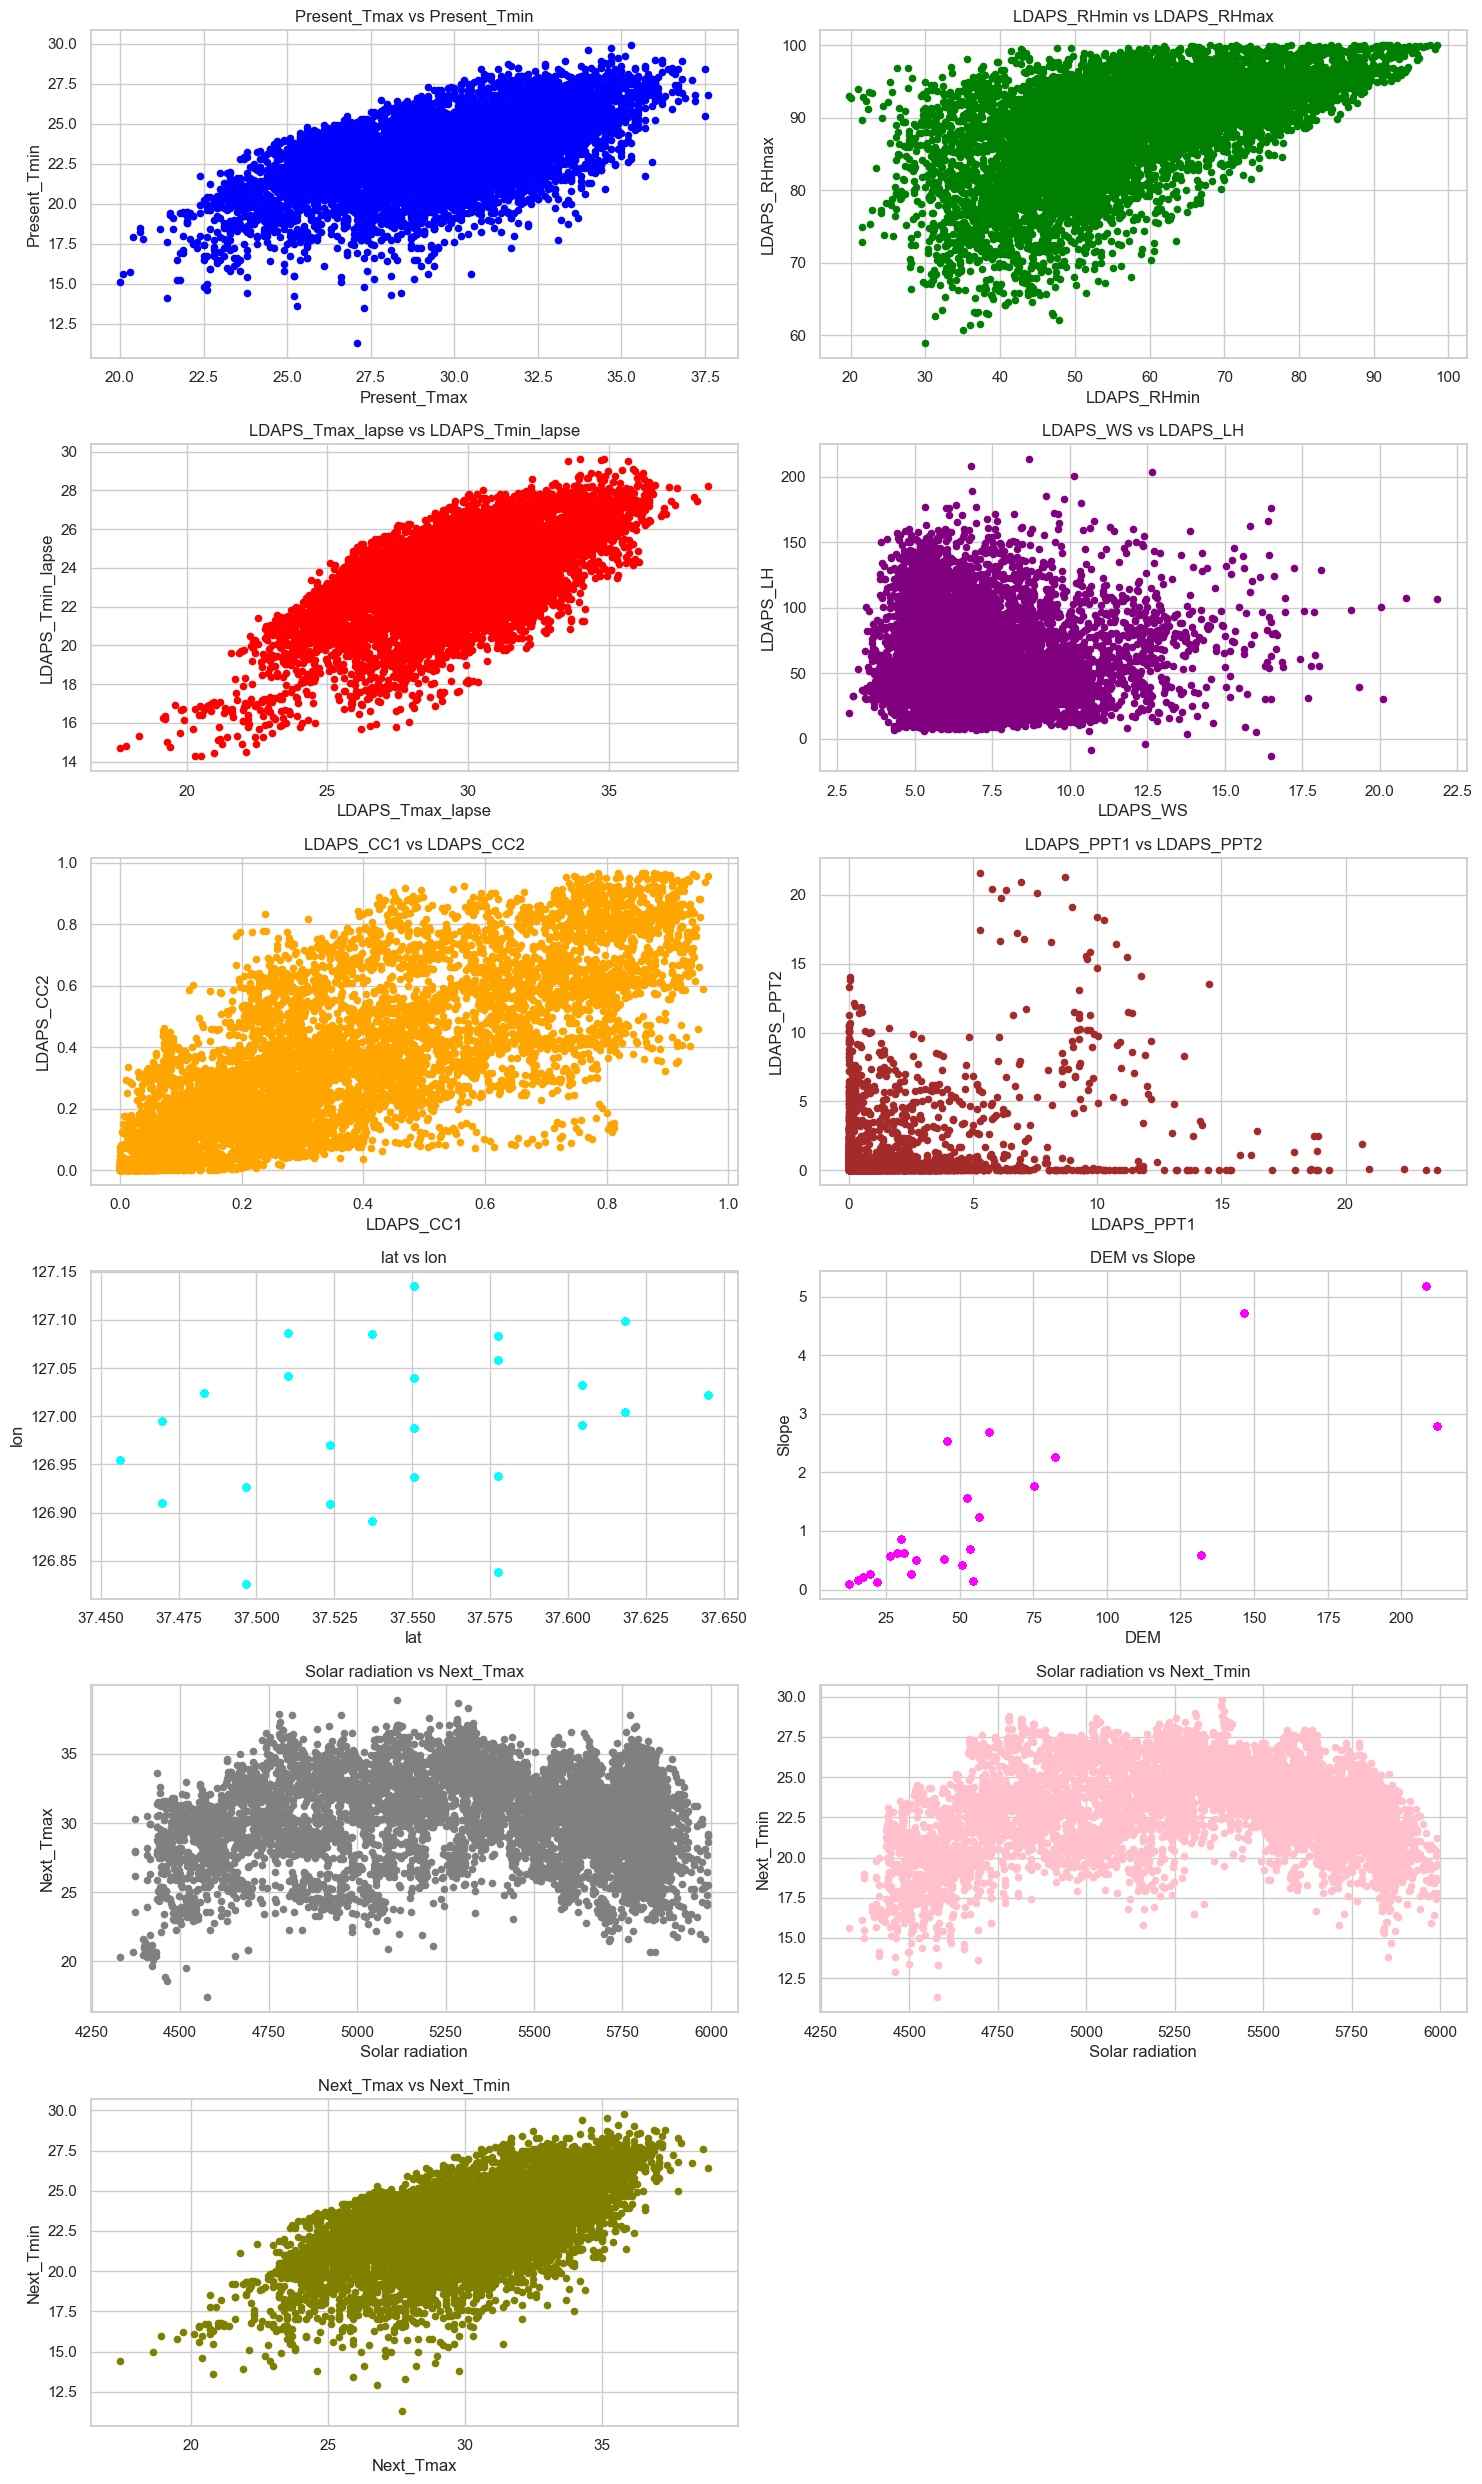

In [29]:
# Create subplots
fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (15, 25))

# Present_Tmax vs Present_Tmin
df.plot.scatter(x = 'Present_Tmax', y = 'Present_Tmin', ax = axes[0, 0], color = 'blue')
axes[0, 0].set_title('Present_Tmax vs Present_Tmin')

# LDAPS_RHmin vs LDAPS_RHmax
df.plot.scatter(x = 'LDAPS_RHmin', y = 'LDAPS_RHmax', ax = axes[0, 1], color = 'green')
axes[0, 1].set_title('LDAPS_RHmin vs LDAPS_RHmax')

# LDAPS_Tmax_lapse vs LDAPS_Tmin_lapse
df.plot.scatter(x = 'LDAPS_Tmax_lapse', y = 'LDAPS_Tmin_lapse', ax = axes[1, 0], color = 'red')
axes[1,0 ].set_title('LDAPS_Tmax_lapse vs LDAPS_Tmin_lapse')

# LDAPS_WS vs LDAPS_LH
df.plot.scatter(x = 'LDAPS_WS', y = 'LDAPS_LH', ax = axes[1, 1], color = 'purple')
axes[1, 1].set_title('LDAPS_WS vs LDAPS_LH')

# LDAPS_CC1 vs LDAPS_CC2
df.plot.scatter(x = 'LDAPS_CC1', y = 'LDAPS_CC2', ax = axes[2, 0], color = 'orange')
axes[2, 0].set_title('LDAPS_CC1 vs LDAPS_CC2')

# LDAPS_PPT1 vs LDAPS_PPT2
df.plot.scatter(x = 'LDAPS_PPT1', y = 'LDAPS_PPT2', ax = axes[2, 1], color = 'brown')
axes[2, 1].set_title('LDAPS_PPT1 vs LDAPS_PPT2')

# lat vs lon
df.plot.scatter(x = 'lat', y = 'lon', ax=axes[3, 0], color = 'cyan')
axes[3, 0].set_title('lat vs lon')

# DEM vs Slope
df.plot.scatter(x = 'DEM', y = 'Slope', ax = axes[3, 1], color = 'magenta')
axes[3, 1].set_title('DEM vs Slope')

# Solar radiation vs Next_Tmax
df.plot.scatter(x = 'Solar radiation', y = 'Next_Tmax', ax = axes[4, 0], color = 'gray')
axes[4, 0].set_title('Solar radiation vs Next_Tmax')

# Solar radiation vs Next_Tmin
df.plot.scatter(x = 'Solar radiation', y = 'Next_Tmin', ax = axes[4, 1], color = 'pink')
axes[4, 1].set_title('Solar radiation vs Next_Tmin')

#  Next_Tmax vs Next_Tmin
df.plot.scatter(x = 'Next_Tmax', y = 'Next_Tmin', ax = axes[5, 0], color = 'olive')
axes[5, 0].set_title('Next_Tmax vs Next_Tmin')

fig.delaxes(axes[5, 1])

plt.tight_layout()
plt.show()

### Observations:

#### Present_Tmax vs Present_Tmin
Positive correlation: As Present_Tmax increases, Present_Tmin tends to increase.

#### LDAPS_RHmin vs LDAPS_RHmax
Positive correlation: Higher LDAPS_RHmin is associated with higher LDAPS_RHmax.

#### LDAPS_Tmax_lapse vs LDAPS_Tmin_lapse
Positive correlation: Higher LDAPS_Tmax_lapse corresponds to higher LDAPS_Tmin_lapse.

#### LDAPS_WS vs LDAPS_LH
No significant correlation: LDAPS_WS and LDAPS_LH appear unrelated.

#### LDAPS_CC1 vs LDAPS_CC2
Strong positive correlation: LDAPS_CC1 and LDAPS_CC2 increase together.

#### LDAPS_PPT1 vs LDAPS_PPT2
Moderate positive correlation: LDAPS_PPT1 and LDAPS_PPT2 tend to increase together.

#### lat vs lon
Weak positive correlation: Latitude and longitude are loosely related.

#### DEM vs Slope
Strong positive correlation: As elevation (DEM) increases, slope also increases.

#### Solar radiation vs Next_Tmax
Weak positive correlation: Solar radiation has a slight influence on Next_Tmax.

#### Solar radiation vs Next_Tmin
Weak positive correlation: Solar radiation has a slight influence on Next_Tmin.

#### Next_Tmax vs Next_Tmin
Moderate positive correlation: Higher Next_Tmax is associated with higher Next_Tmin.

### Bar Graph

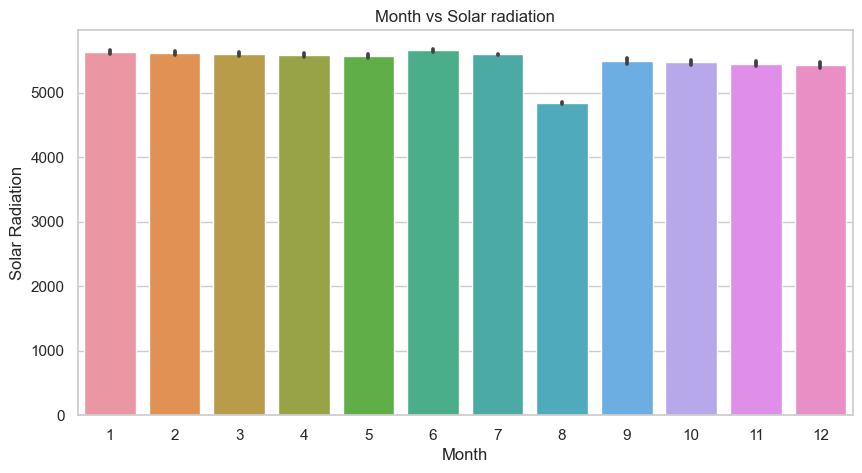

In [30]:
plt.figure(figsize = (10, 5))
sns.barplot(y = 'Solar radiation',x = 'Month', data = df)
plt.title("Month vs Solar radiation")
plt.xlabel("Month")
plt.ylabel("Solar Radiation")
plt.show()

### Observations:
Solar radiation peaks in the summer months (June) and is lowest in the winter (December).

There is a steady decline in solar radiation from June to December.

Mid-year months have relatively higher radiation, with July being slightly lower.

March and September represent transitional months.

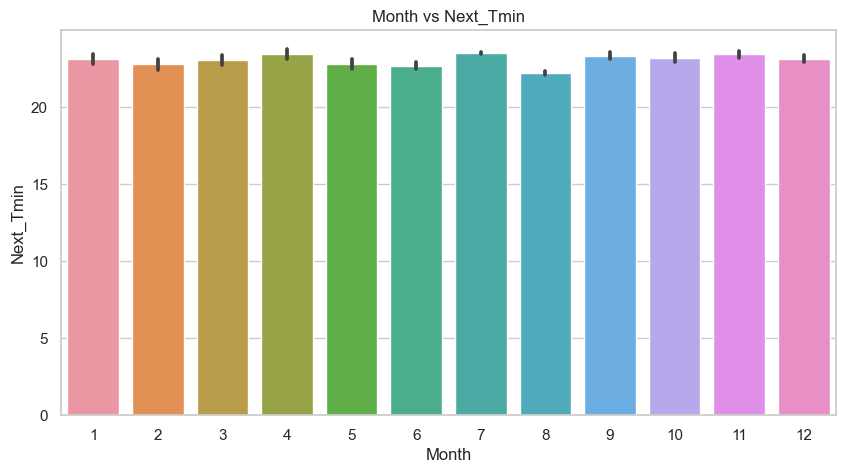

In [31]:
plt.figure(figsize = (10, 5))
sns.barplot(y = 'Next_Tmin',x = 'Month',data = df)
plt.title("Month vs Next_Tmin")
plt.xlabel("Month")
plt.ylabel("Next_Tmin")
plt.show()

### Observations:
Warmer temperatures are observed in the summer months (July), and colder temperatures occur in the winter (January).

There is a clear seasonal pattern, with temperatures rising from winter to summer and declining from summer to winter.

Mid-year months (June to August) have relatively consistent and higher temperatures.

March and September represent transitional months with changing temperatures.

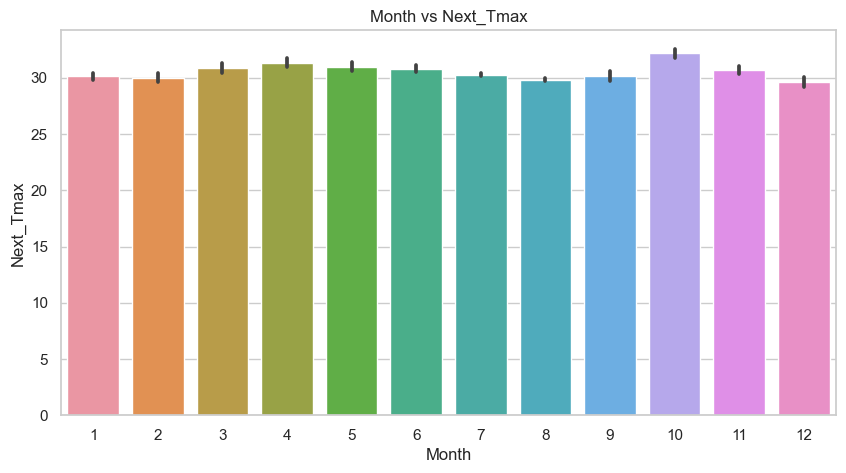

In [32]:
plt.figure(figsize = (10, 5))
sns.barplot(y = 'Next_Tmax',x = 'Month',data = df)
plt.title("Month vs Next_Tmax")
plt.xlabel("Month")
plt.ylabel("Next_Tmax")
plt.show()

### Observations: 
October (Month 10) experiences the highest mean next day maximum temperatures, averaging around 32.17°C, marking the warmest month of the year.

December (Month 12) exhibits the lowest mean temperatures, with an average of approximately 29.62°C, representing the coolest month.

The autumn months (September to November) are characterized by the highest temperatures, while the winter months (December to February) are notably cooler.

Temperature patterns follow a distinct seasonal cycle, with a peak in October during the autumn season.

## Multivariate Analysis

### Line Plot

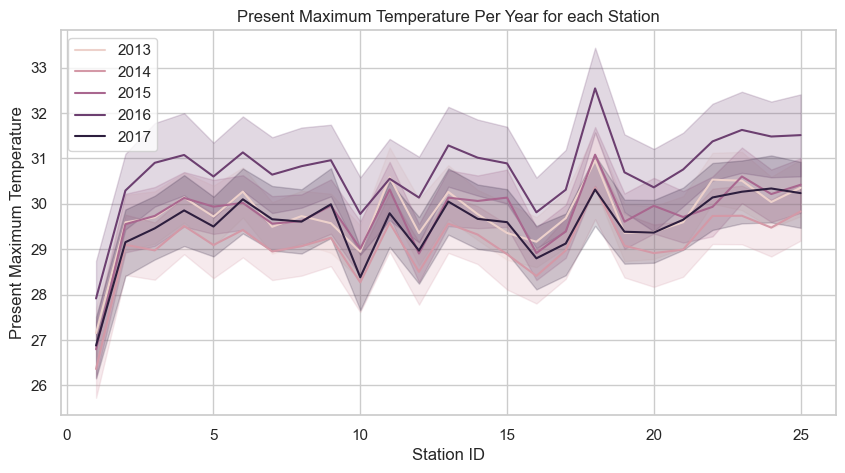

In [33]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = df, x = 'station', y = 'Present_Tmax', hue = 'Year')
plt.title('Present Maximum Temperature Per Year for each Station')
plt.xlabel('Station ID')
plt.ylabel('Present Maximum Temperature')
plt.legend()
plt.show()

### Observations:
Temperature varies among stations.

General trend: Temperature rise from 2013 to 2016, dip in 2017.

Seasonal patterns: Middle years warmer.

Station 18 has notably high temperature.

2013 starts with lower temperature.

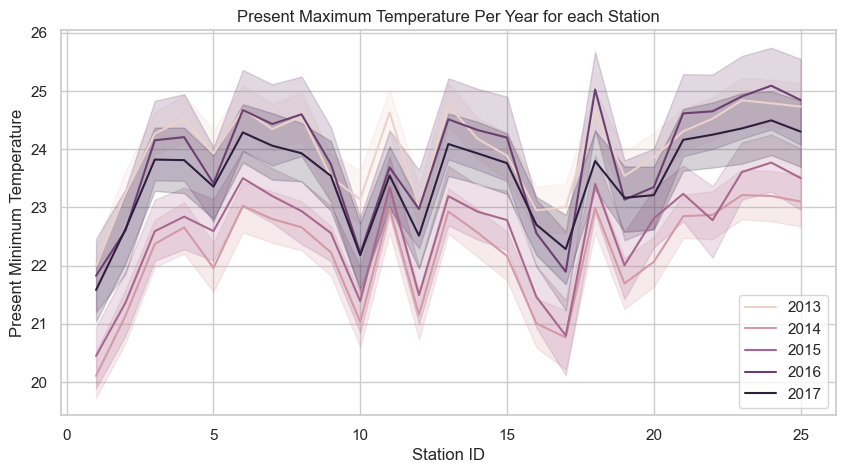

In [34]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = df, x = 'station', y = 'Present_Tmin', hue = 'Year')
plt.title('Present Maximum Temperature Per Year for each Station')
plt.xlabel('Station ID')
plt.ylabel('Present Minimum Temperature')
plt.legend()
plt.show()

### Observations:
Temperature fluctuations among stations.

Overall trend: Temps increase from 2013 to 2016 and then decrease in 2017.

Seasonal variations are evident.

Station 18 exhibits the highest temperatures.

The year 2013 starts with lower temperatures.

## Storing this dataset separately for building Next-Day Minimum Temperature Prediction and Next-Day Maximum Temperature Prediction models

In [35]:
# For Next-Day Minimum Temperature Prediction
df_min_temp = df.copy()

# For Next-Day Maximum Temperature Prediction
df_max_temp = df.copy()

# Building Next-Day Minimum Temperature Prediction Model
## Features and Target variable for Next-Day Minimum Temperature Prediction:
### Features:
station, Date, Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, lat, lon, DEM, Slope, Solar radiation, Next_Tmax

### Target variable:
Next_Tmin

In [36]:
# Display the dataset
df_min_temp.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

       lat      lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  \
0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1       21.2   
1  37.6046  127.032   44.7624  0.5141      5869.312500       30.5       22.5   
2  37.5776  127.058   33.3068  0.2661      5863.555664       31.1       23.9   
3  37.6450  127.022   45.7160  2.5348      5856.964844       31.7       24.3   
4  37.5507  127.135   35.0380  0.5055      5859.552246       31.2       22.5   

   Year  Month  Day  
0  2013      6   30  
1  2013      6   30  
2  2013      6   30  
3  2013      6   30  
4  2013      6   30  

[5 rows x 27 columns]

# Data Preprocessing

## Checking for the outliers

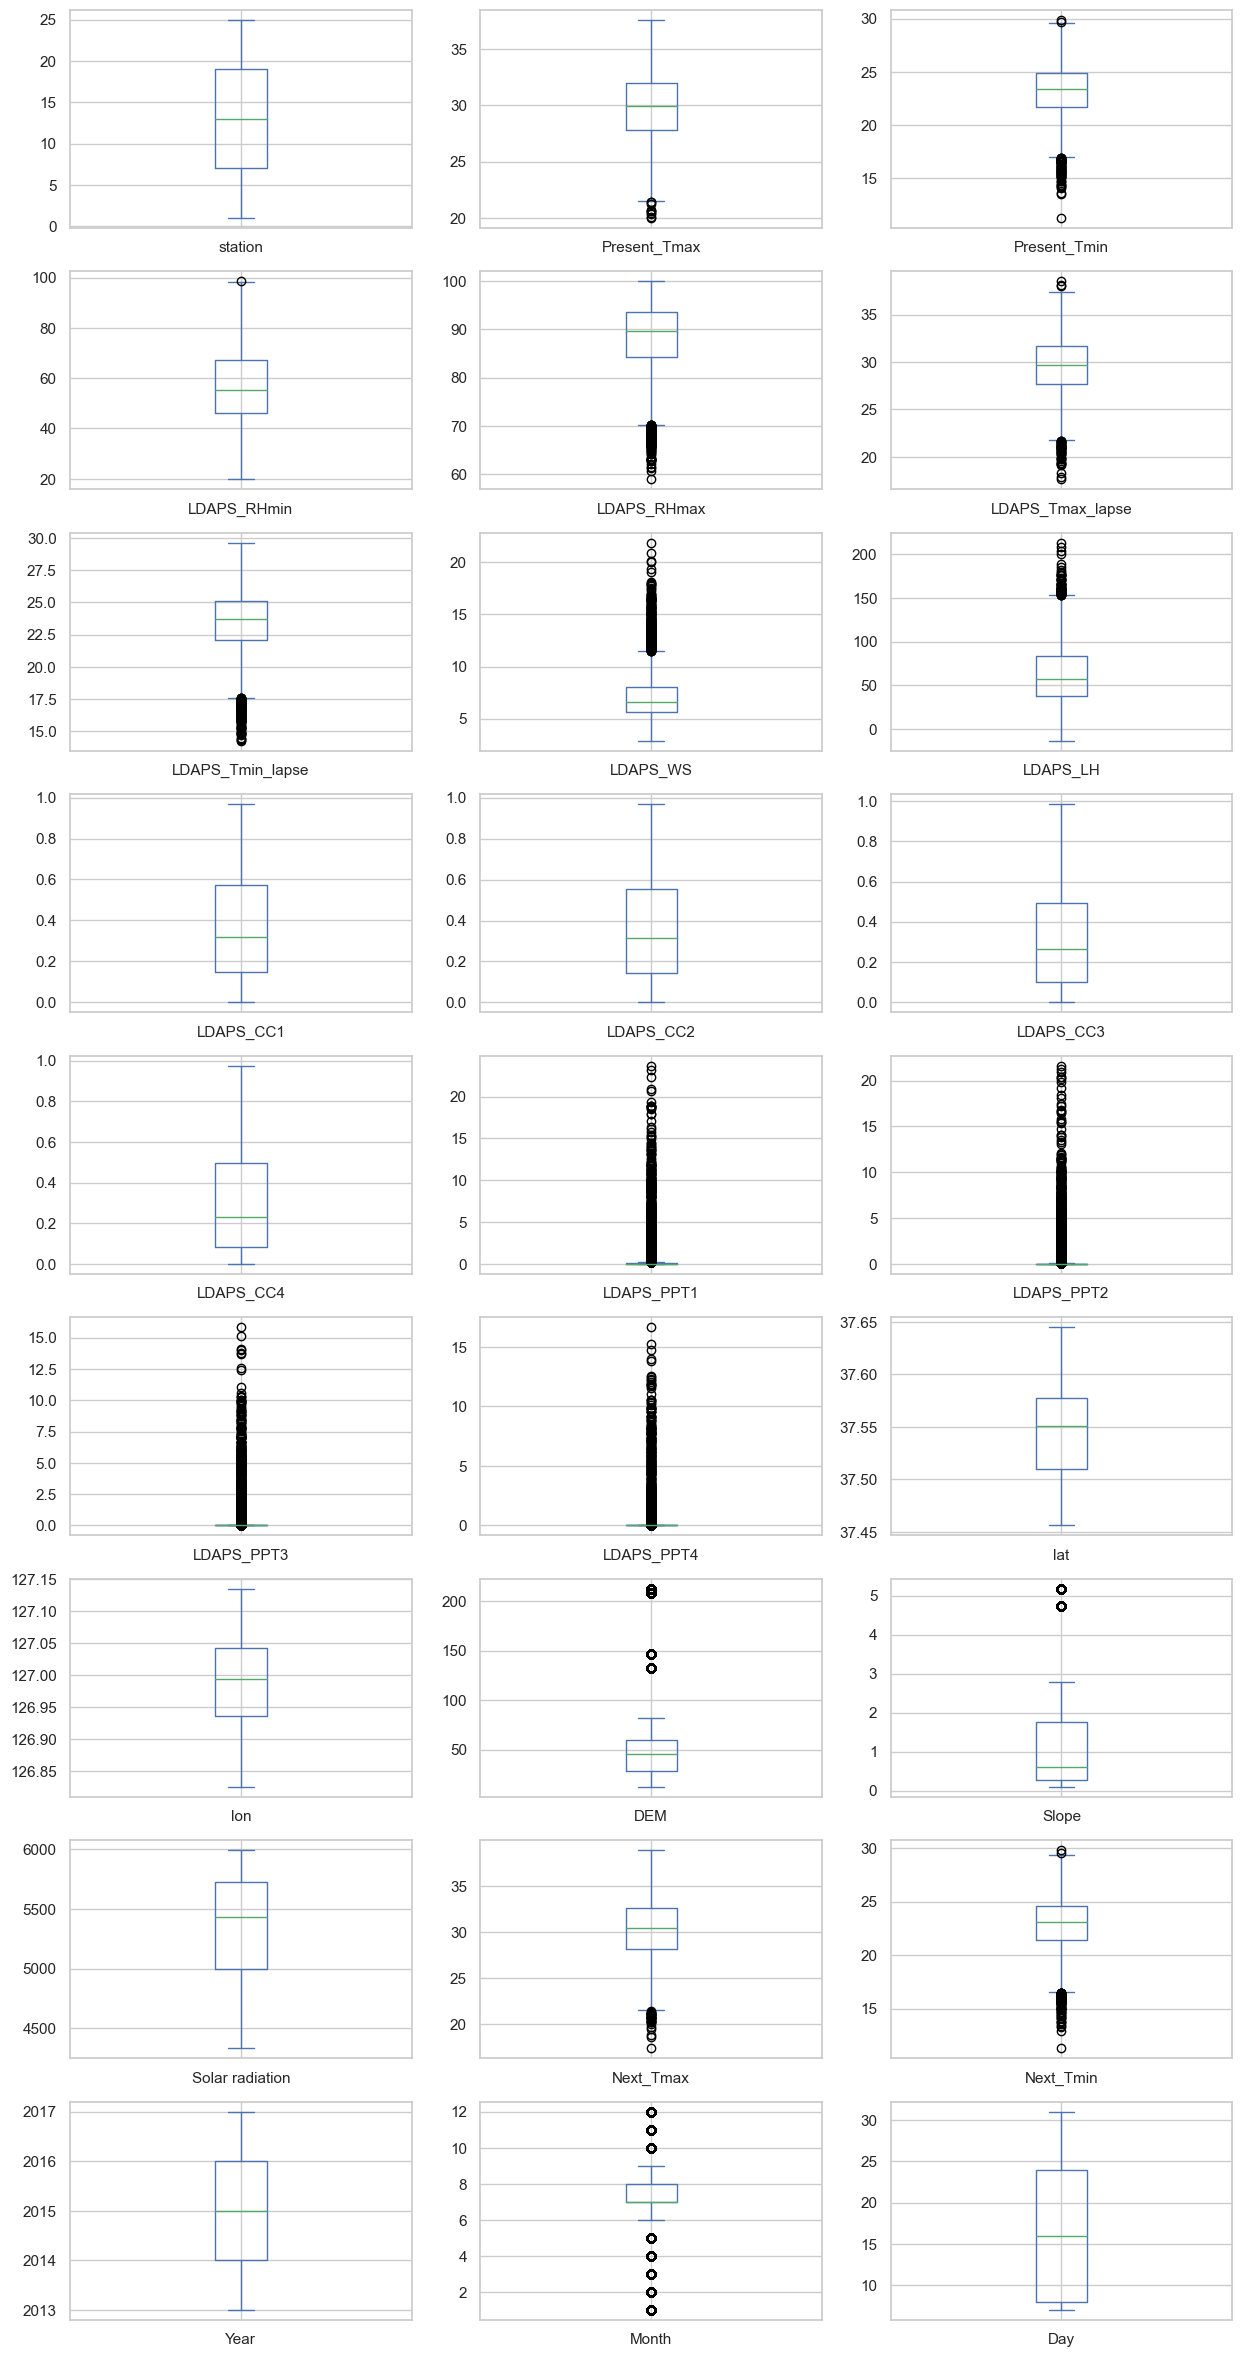

In [37]:
# Checking for the outliers using boxplot
df_min_temp.plot(kind = 'box', subplots = True, figsize = (15, 30), layout = (9, 3))
plt.show()

Outliers are present in 'Present_Tmin', 'Present_Tmax', 'LDAPS_HRmin', 'LDAPS_HRmax', 'LDAPS_Tmin_lapse', 'LDAPS_Tmax_lapse','LDAPH_WS', 'LDAPS_LH', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope', 'Next_Tmax', 'Next_Tmin' and 'Month' columns but 'Next_Tmin' is target variable therefore, it will not be considered for outliers removal. 

In [38]:
# List of columns containing outliers
columns_with_outliers = ['Present_Tmin', 'Present_Tmax', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmin_lapse', 'LDAPS_Tmax_lapse',
                         'LDAPS_WS', 'LDAPS_LH', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope', 
                         'Next_Tmax', 'Month']

In [39]:
# Checking for the outliers using Z-Score
z_score = abs(zscore(df_min_temp[columns_with_outliers]))
z_score

Present_Tmin  Present_Tmax  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmin_lapse  \
0         0.761306      0.361783     0.102642     0.383188          0.217125   
1         0.677909      0.721741     0.308235     0.311615          0.223969   
2         0.030964      0.620161     0.553221     0.616004          0.451634   
3         0.072663      0.755601     0.101551     1.134015          0.080155   
4         0.552814      0.552440     0.040088     0.248722          0.011377   
...            ...           ...          ...          ...               ...   
7745      2.262449      2.257951     2.198944     1.415076          2.235344   
7746      2.429243      2.461112     1.828277     0.655672          2.445139   
7747      2.554338      2.190230     2.058222     1.329957          2.032547   
7748      2.304148      2.190230     2.243400     1.550265          2.050636   
7749      2.429243      2.224091     2.319347     1.557432          2.140974   

      LDAPS_Tmax_lapse  LDAPS_WS  LDAPS_LH  LDAPS_PPT1  LDAPS_PPT2  \
0             0.525839  0.128146  0.207570    0.307032    0.277533   
1             0.080884  0.648368  0.315025    0.307032    0.277533   
2             0.163053  0.442340  1.250879    0.307032    0.277533   
3             0.031004  0.667681  0.096433    0.307032    0.277533   
4             0.170725  0.628466  1.356745    0.307032    0.277533   
...                ...       ...       ...         ...         ...   
7745          0.615111  0.227683  1.577874    0.307032    0.277533   
7746          0.993434  0.613197  0.586361    0.307032    0.277533   
7747          1.113927  0.437404  0.285342    0.307032    0.277533   
7748          0.889174  0.255579  0.455145    0.307032    0.277533   
7749          0.571801  0.088979  1.593510    0.307032    0.277533   

      LDAPS_PPT3  LDAPS_PPT4       DEM     Slope  Next_Tmax     Month  
0       0.241726    0.225401  2.773649  1.115761   0.377009  0.482815  
1       0.241726    0.225401  0.315050  0.542139   0.072026  0.482815  
2       0.241726    0.225401  0.526200  0.723195   0.264470  0.482815  
3       0.241726    0.225401  0.297473  0.933099   0.456914  0.482815  
4       0.241726    0.225401  0.494290  0.548418   0.296544  0.482815  
...          ...         ...       ...       ...        ...       ...  
7745    0.241726    0.225401  0.655386  0.499795   0.858119  0.410753  
7746    0.241726    0.225401  0.735219  0.820220   0.729823  0.410753  
7747    0.241726    0.225401  0.852800  0.804013   0.633601  0.410753  
7748    0.241726    0.225401  0.821318  0.755171   0.537379  0.410753  
7749    0.241726    0.225401  0.779131  0.719398   0.793971  0.410753  

[7750 rows x 16 columns]

In [40]:
# Identify the indices where the z-score is greater than 3
np.where(z_score > 3)

(array([  25,   25,   26, ..., 7743, 7744, 7744], dtype=int64),
 array([6, 9, 9, ..., 0, 0, 4], dtype=int64))

In [41]:
# Removing Outliers
z = 3
updated_df_min_temp = df_min_temp[(z_score < z).all(axis = 1)]
updated_df_min_temp

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233947   
1            29.850689         24.035009  5.691890   51.937448   0.225508   
2            30.091292         24.565633  6.138224   20.573050   0.209344   
3            29.704629         23.326177  5.650050   65.727144   0.216372   
4            29.113934         23.486480  5.735004  107.965535   0.151407   
...                ...               ...       ...         ...        ...   
7745         27.812697         18.303014  6.603253    9.614074   0.052902   
7746         26.704905         17.814038  5.768083   82.146707   0.066461   
7747         26.352081         18.775678  6.148918   72.058294   0.030034   
7748         27.010193         18.733519  6.542819   47.241457   0.035874   
7749         27.939516         18.522965  7.289264    9.090034   0.048954   

      ...      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0     ...  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1     ...  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2     ...  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3     ...  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4     ...  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   
...   ...      ...      ...       ...     ...              ...        ...   
7745  ...  37.5507  127.040   26.2980  0.5721      4456.024414       27.6   
7746  ...  37.5102  127.086   21.9668  0.1332      4441.803711       28.0   
7747  ...  37.5372  126.891   15.5876  0.1554      4443.313965       28.3   
7748  ...  37.5237  126.909   17.2956  0.2223      4438.373535       28.6   
7749  ...  37.5237  126.970   19.5844  0.2713      4451.345215       27.8   

      Next_Tmin  Year  Month  Day  
0          21.2  2013      6   30  
1          22.5  2013      6   30  
2          23.9  2013      6   30  
3          24.3  2013      6   30  
4          22.5  2013      6   30  
...         ...   ...    ...  ...  
7745       17.7  2017      8   30  
7746       17.1  2017      8   30  
7747       18.1  2017      8   30  
7748       18.8  2017      8   30  
7749       17.4  2017      8   30  

[6900 rows x 27 columns]

In [42]:
# Checking the shape of dataframe after removing the outliers
updated_df_min_temp.shape

(6900, 27)

## Checking for the skewness

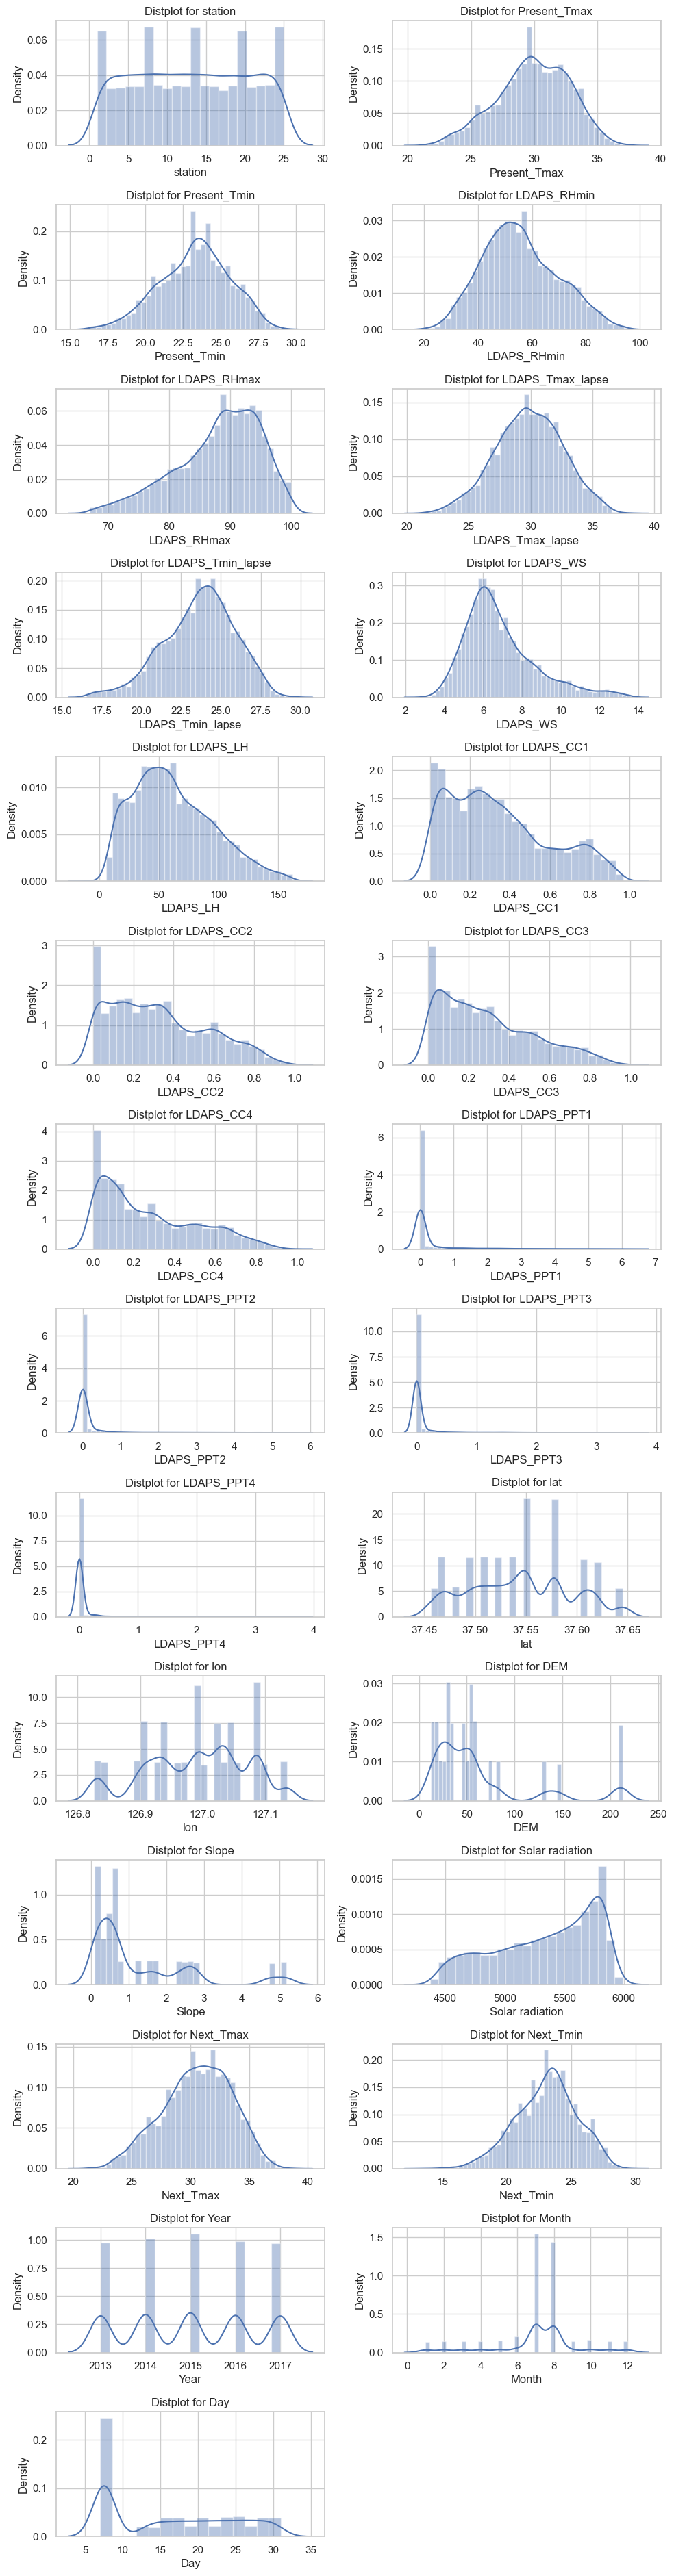

In [43]:
# Checking for the skewness using Distplot
rows = 15
columns = 2
plt.figure(figsize=(10, 40))

columns_to_plot = updated_df_min_temp.columns

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i + 1)
    sns.distplot(updated_df_min_temp[columns_to_plot[i]])
    plt.title("Distplot for " + columns_to_plot[i])
    plt.tight_layout()

plt.show()

### Observations:

#### Columns with Negative Skewness
Present_Tmax, Present_Tmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, Solar radiation, Next_Tmax, Next_Tmin, Month: 

These columns indicating that their distributions are skewed to the left. This suggests that there may be more lower values in the data for these features.

#### Columns with Positive Skewness
LDAPS_WS, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM, Slope:

These columns indicating that their distributions are skewed to the right. This suggests that there may be more higher values in the data for these features.

#### Columns with Skewness Near Zero
station, LDAPS_RHmin, LDAPS_LH, lat, lon, Year, Day: 

These columns have skewness close to zero, indicating relatively balanced distributions without strong skewness in either direction.

In [44]:
# Checking for the skewness using skew() method
updated_df_min_temp.skew()

station             0.002214
Present_Tmax       -0.276506
Present_Tmin       -0.230426
LDAPS_RHmin         0.306492
LDAPS_RHmax        -0.685219
LDAPS_Tmax_lapse   -0.105231
LDAPS_Tmin_lapse   -0.394931
LDAPS_WS            1.087077
LDAPS_LH            0.566480
LDAPS_CC1           0.595765
LDAPS_CC2           0.502371
LDAPS_CC3           0.702454
LDAPS_CC4           0.712431
LDAPS_PPT1          3.726927
LDAPS_PPT2          4.864892
LDAPS_PPT3          5.484945
LDAPS_PPT4          5.932805
lat                 0.106368
lon                -0.275990
DEM                 1.763772
Slope               1.594478
Solar radiation    -0.503794
Next_Tmax          -0.265434
Next_Tmin          -0.291886
Year                0.009244
Month              -0.684268
Day                 0.253193
dtype: float64

Skewness is present in 'LDAPS_WS', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM' and 'Slope' columns.

In [45]:
# List of the columns to be transformed
columns_to_transform = ['LDAPS_WS', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope']

# Copying data
updated_df_min_temp2 = updated_df_min_temp.copy()

# Reduing skewnees using yeojohnson Transformation
for column in columns_to_transform: 
    transformed_data, lambda_value = yeojohnson(updated_df_min_temp[column] + 1)
    updated_df_min_temp2[column] = transformed_data

In [46]:
# Again checking for the skewness
updated_df_min_temp2[columns_to_transform].skew()

LDAPS_WS      0.009588
LDAPS_PPT1    1.612313
LDAPS_PPT2    1.805860
LDAPS_PPT3    0.000000
LDAPS_PPT4    0.000000
DEM           0.042724
Slope         0.305154
dtype: float64

Skewness in every column has been reduced, indicating a more balanced and symmetric distribution of data in each column.

In [47]:
# Display the updated dataset
updated_df_min_temp2.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  0.904321   69.451805   0.233947  ...   
1         29.850689         24.035009  0.886725   51.937448   0.225508  ...   
2         30.091292         24.565633  0.894269   20.573050   0.209344  ...   
3         29.704629         23.326177  0.885973   65.727144   0.216372  ...   
4         29.113934         23.486480  0.887491  107.965535   0.151407  ...   

       lat      lon       DEM     Slope  Solar radiation  Next_Tmax  \
0  37.6046  126.991  2.707566  0.514375      5992.895996       29.1   
1  37.6046  127.032  2.308548  0.444726      5869.312500       30.5   
2  37.5776  127.058  2.213433  0.423633      5863.555664       31.1   
3  37.6450  127.022  2.315084  0.511179      5856.964844       31.7   
4  37.5507  127.135  2.230193  0.444092      5859.552246       31.2   

   Next_Tmin  Year  Month  Day  
0       21.2  2013      6   30  
1       22.5  2013      6   30  
2       23.9  2013      6   30  
3       24.3  2013      6   30  
4       22.5  2013      6   30  

[5 rows x 27 columns]

## Correlation Coefficient Matrix

In [48]:
# Checking the correalation coefficient matrix
correlation_coefficient = updated_df_min_temp2.corr()
correlation_coefficient

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110262      0.132237    -0.067269   
Present_Tmax      0.110262      1.000000      0.614205    -0.148629   
Present_Tmin      0.132237      0.614205      1.000000     0.154335   
LDAPS_RHmin      -0.067269     -0.148629      0.154335     1.000000   
LDAPS_RHmax      -0.171445     -0.290875     -0.034128     0.553116   
LDAPS_Tmax_lapse  0.065784      0.535373      0.435700    -0.551287   
LDAPS_Tmin_lapse  0.103306      0.610612      0.754744     0.137249   
LDAPS_WS          0.028279     -0.070775      0.036367     0.175297   
LDAPS_LH         -0.135202      0.127799     -0.006763    -0.039361   
LDAPS_CC1         0.009693     -0.283678      0.093176     0.576052   
LDAPS_CC2         0.006988     -0.152359      0.121092     0.714743   
LDAPS_CC3         0.008068     -0.058105      0.044613     0.656440   
LDAPS_CC4         0.011771     -0.048051     -0.003659     0.458512   
LDAPS_PPT1       -0.000845     -0.162291      0.096254     0.401675   
LDAPS_PPT2       -0.006694     -0.071714      0.119122     0.493579   
LDAPS_PPT3       -0.003017     -0.000211      0.070319     0.391514   
LDAPS_PPT4        0.000410      0.002427     -0.020809     0.233814   
lat              -0.239713     -0.050849     -0.071137     0.089537   
lon              -0.122104      0.010687     -0.044905    -0.095142   
DEM              -0.324724     -0.131516     -0.239230     0.054812   
Slope            -0.143253     -0.093670     -0.156618     0.085540   
Solar radiation  -0.028948     -0.061670      0.015140     0.252543   
Next_Tmax         0.106611      0.586708      0.448102    -0.424659   
Next_Tmin         0.128138      0.615836      0.785853     0.140282   
Year              0.005806      0.102344      0.095759    -0.001552   
Month             0.001717      0.023711     -0.013125    -0.072510   
Day               0.005425     -0.127349     -0.071663    -0.072068   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.171445          0.065784          0.103306  0.028279   
Present_Tmax        -0.290875          0.535373          0.610612 -0.070775   
Present_Tmin        -0.034128          0.435700          0.754744  0.036367   
LDAPS_RHmin          0.553116         -0.551287          0.137249  0.175297   
LDAPS_RHmax          1.000000         -0.383593         -0.134024  0.046731   
LDAPS_Tmax_lapse    -0.383593          1.000000          0.619957 -0.157943   
LDAPS_Tmin_lapse    -0.134024          0.619957          1.000000 -0.013390   
LDAPS_WS             0.046731         -0.157943         -0.013390  1.000000   
LDAPS_LH             0.269582          0.035553         -0.138329 -0.058805   
LDAPS_CC1            0.411722         -0.414518          0.042442  0.207264   
LDAPS_CC2            0.363051         -0.490705          0.107013  0.158956   
LDAPS_CC3            0.171204         -0.500474          0.024438  0.105482   
LDAPS_CC4            0.053416         -0.386304         -0.028190  0.107511   
LDAPS_PPT1           0.384829         -0.297862         -0.039609  0.202235   
LDAPS_PPT2           0.331876         -0.331019          0.035184  0.166007   
LDAPS_PPT3           0.203905         -0.273157         -0.016176  0.098141   
LDAPS_PPT4           0.115179         -0.198957         -0.083369  0.171788   
lat                  0.199286         -0.038021         -0.089429 -0.025187   
lon                  0.016384          0.102216         -0.031117 -0.075733   
DEM                  0.158825         -0.111973         -0.172778  0.113217   
Slope                0.189923         -0.110001         -0.159364  0.095107   
Solar radiation      0.155520          0.015161          0.111961  0.143429   
Next_Tmax           -0.297580          0.806004          0.539285 -0.202181   
Next_Tmin           -0.088597          0.546161          0.868266  0.023660   
Year                -0.140968          0.062131        

Let's use the heatmap to visualize and interpret the correlation coefficient matrix.

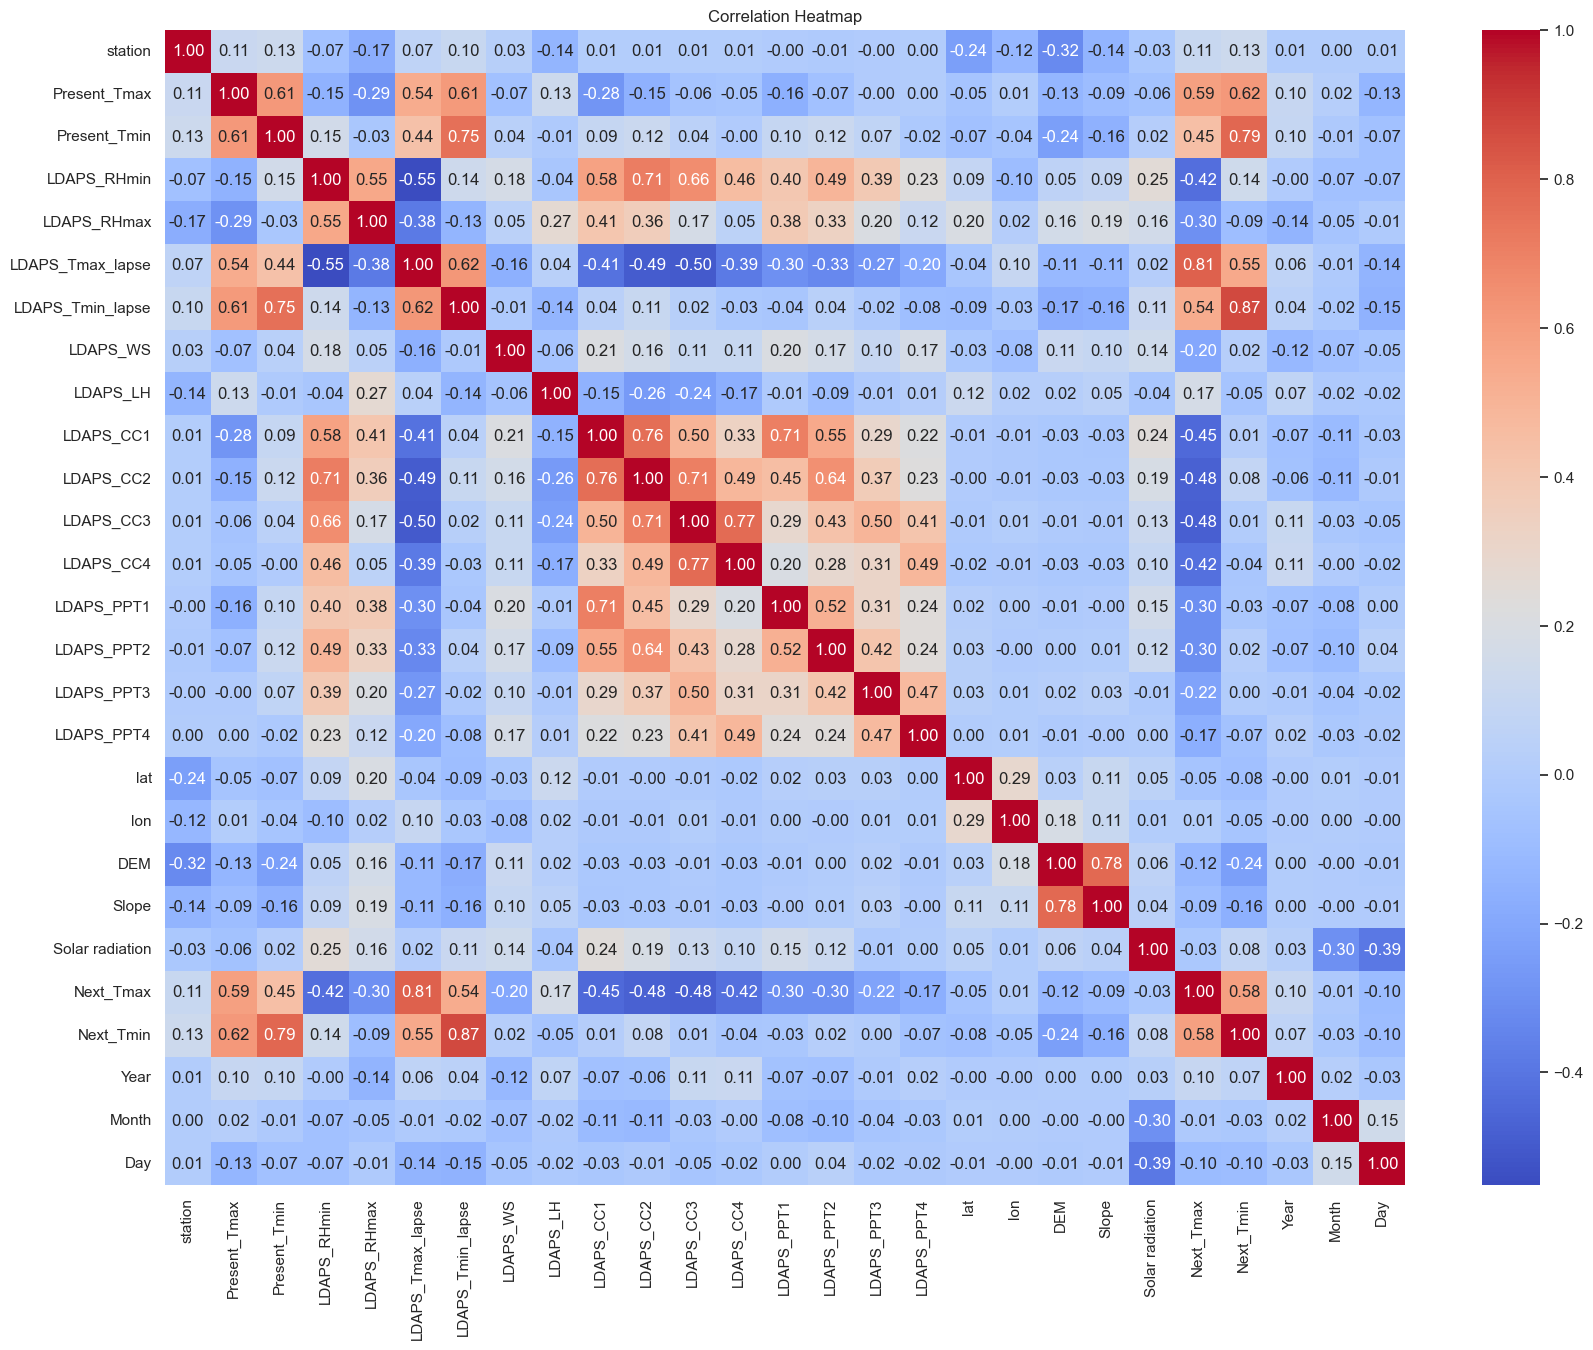

In [49]:
# Plotting the heatmap for correlation coefficient matrix
plt.figure(figsize = (20, 15))
sns.heatmap(correlation_coefficient, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show()

### Observations:
station: This column represents a station identifier. There is no meaningful correlation with other numerical variables, which is expected since it's an identifier.

Present_Tmax: It has positive correlations with several variables, including 'Present_Tmin', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', and 'Next_Tmax'. This suggests that higher present-day maximum temperatures tend to be associated with higher present-day minimum temperatures and other temperature-related variables.

Present_Tmin: It exhibits similar positive correlations to 'Present_Tmax' and other temperature-related variables.

LDAPS_RHmin: This represents the minimum relative humidity. It has a positive correlation with 'LDAPS_RHmax' and 'LDAPS_PPT1' but a negative correlation with some temperature-related variables like 'Present_Tmax' and 'Present_Tmin'. This suggests that higher relative humidity tends to be associated with lower temperatures.

LDAPS_RHmax: Similar to 'LDAPS_RHmin', it has positive correlations with humidity-related variables and negative correlations with temperature-related variables.

LDAPS_Tmax_lapse: This is the temperature variable with lapse rate correction. It has strong positive correlations with other temperature-related variables, suggesting that temperatures at different times of the day are closely related.

LDAPS_Tmin_lapse: Similar to 'LDAPS_Tmax_lapse', it has strong positive correlations with temperature-related variables.

LDAPS_WS: This represents wind speed. It has a positive correlation with 'LDAPS_PPT1' and 'LDAPS_CC1', indicating that higher wind speeds may be associated with more precipitation and cloud cover.

LDAPS_LH: This represents latent heat flux. It has a positive correlation with 'LDAPS_PPT1', indicating that higher latent heat flux may be associated with more precipitation.

LDAPS_CC1: It exhibits positive correlations with other cloud cover variables ('LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4') and some temperature-related variables.

LDAPS_CC2: Similar to 'LDAPS_CC1', positively correlated with other cloud cover variables and some temperature-related variables.

LDAPS_CC3: Positively correlated with other cloud cover variables and some temperature-related variables.

LDAPS_CC4: Positively correlated with other cloud cover variables and some temperature-related variables.

LDAPS_PPT1: Positively correlated with precipitation and some cloud cover variables, indicating that higher precipitation is associated with more cloud cover.

LDAPS_PPT2: Positively correlated with precipitation and cloud cover variables.

LDAPS_PPT3: Positively correlated with precipitation and cloud cover variables.

LDAPS_PPT4: Positively correlated with precipitation and cloud cover variables.

lat: Latitude has negative correlations with some temperature-related variables and 'DEM', suggesting that higher latitudes tend to be associated with lower temperatures and elevations.

lon: Longitude does not exhibit strong correlations with most variables, indicating that it may not have a strong linear relationship with the other weather-related features.

DEM: Digital Elevation Model has negative correlations with temperature-related variables, suggesting that higher elevations are associated with lower temperatures.

Slope: Slope has correlations similar to 'DEM' and exhibits a negative correlation with temperature-related variables.

Solar radiation: It has positive correlations with some temperature-related variables and negative correlations with 'LDAPS_WS', indicating that higher solar radiation is associated with higher temperatures and lower wind speeds.

Next_Tmax: The next-day maximum temperature has strong positive correlations with temperature-related variables like 'Present_Tmax', 'Present_Tmin', 'LDAPS_Tmax_lapse', and 'LDAPS_Tmin_lapse'.

Next_Tmin: Similar to 'Next_Tmax', the next-day minimum temperature has strong positive correlations with temperature-related variables.

Year: The 'Year' variable does not have strong correlations with most other variables, which is expected since it represents a temporal feature.

Month: Similar to 'Year', the 'Month' variable does not have strong correlations with other variables.

Day: The 'Day' variable does not exhibit strong correlations with other variables, as it represents another temporal feature.

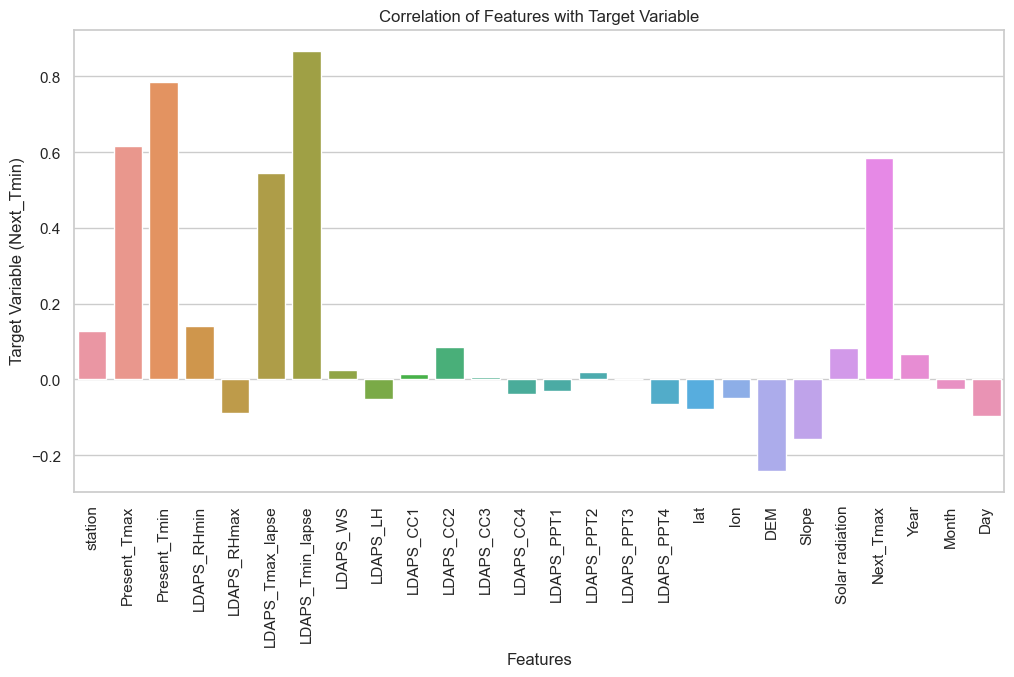

In [50]:
# Checking for the correlation between features and target variable separately
target = 'Next_Tmin'

correlation_matrix = updated_df_min_temp2.corr()
correlations_with_target = correlation_matrix[target].drop(target)

plt.figure(figsize=(12, 6))
sns.barplot(x = correlations_with_target.index, y = correlations_with_target.values)
plt.xlabel('Features')
plt.ylabel('Target Variable (Next_Tmin)')
plt.title('Correlation of Features with Target Variable')
plt.xticks(rotation = 90)

plt.show()

### Observations:
Next_Tmin, representing the next-day minimum temperature, exhibits strong positive correlations with several independent variables, including Present_Tmax, Present_Tmin, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse and Next_Tmax. This suggests that the next-day minimum temperature is closely related to the temperatures on the present day and their variations throughout the day.

Other independent variables, such as humidity-related variables (LDAPS_RHmin and LDAPS_RHmax), cloud cover variables (LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4), precipitation variables (LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4), and geographical variables (lat, lon, DEM, Slope), do not show strong direct correlations with Next_Tmin.

## Feature Engineering

In [51]:
# Extracting features and target from the dataset
features = updated_df_min_temp2.drop(columns = 'Next_Tmin')
target = updated_df_min_temp2['Next_Tmin']

### Feature Scaling

In [52]:
# Performing standard scaling on the features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(features)

In [53]:
# Creating a DataFrame 'updated_features' to store the scaled data using 'scaled_df'
updated_features = pd.DataFrame(scaled_df, columns = features.columns[:])
updated_features.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0 -1.672126     -0.431691     -0.822544     0.194652     0.438963   
1 -1.533193      0.688242     -0.736109    -0.238912     0.364951   
2 -1.394260      0.583249     -0.001418    -0.497425    -0.594280   
3 -1.255328      0.723240      0.041799     0.193502     1.215376   
4 -1.116395      0.513253     -0.606458     0.044041     0.299914   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0         -0.661586         -0.285285  0.171348  0.223537  -0.442938  ...   
1         -0.011582          0.176494 -0.586364 -0.303241  -0.476634  ...   
2          0.076448          0.414835 -0.261527 -1.246585  -0.541175  ...   
3         -0.065021         -0.141891 -0.618730  0.111511  -0.513113  ...   
4         -0.281140         -0.069888 -0.553373  1.381911  -0.772502  ...   

   LDAPS_PPT4       lat       lon       DEM     Slope  Solar radiation  \
0     -0.4208  1.213410  0.001493  1.852513  1.358064         1.551290   
1     -0.4208  1.213410  0.516045  0.068331 -0.409934         1.257655   
2     -0.4208  0.673210  0.842345 -0.356965 -0.945367         1.243977   
3     -0.4208  2.021710  0.390544  0.097559  1.276923         1.228317   
4     -0.4208  0.135011  1.808698 -0.282024 -0.426022         1.234465   

   Next_Tmax      Year     Month       Day  
0  -0.498673 -1.424869 -0.487181  1.660992  
1  -0.020934 -1.424869 -0.487181  1.660992  
2   0.183812 -1.424869 -0.487181  1.660992  
3   0.388557 -1.424869 -0.487181  1.660992  
4   0.217936 -1.424869 -0.487181  1.660992  

[5 rows x 26 columns]

## Checking for the Variance Inflation Factor

In [54]:
# Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data["Features"] = updated_features.columns
vif_data["VIF"] = [variance_inflation_factor(updated_features.values, i) for i in range(updated_features.shape[1])]

# Print the VIF data
print(vif_data)

            Features       VIF
0            station  1.300784
1       Present_Tmax  2.877805
2       Present_Tmin  3.092977
3        LDAPS_RHmin  5.921322
4        LDAPS_RHmax  2.291185
5   LDAPS_Tmax_lapse  8.003056
6   LDAPS_Tmin_lapse  6.833849
7           LDAPS_WS  1.211058
8           LDAPS_LH  1.579872
9          LDAPS_CC1  4.667380
10         LDAPS_CC2  5.467219
11         LDAPS_CC3  5.259539
12         LDAPS_CC4  3.041117
13        LDAPS_PPT1  2.539737
14        LDAPS_PPT2  2.098854
15        LDAPS_PPT3  1.765905
16        LDAPS_PPT4  1.714527
17               lat  1.272042
18               lon  1.232537
19               DEM  3.218152
20             Slope  2.804160
21   Solar radiation  1.506799
22         Next_Tmax  3.957596
23              Year  1.141108
24             Month  1.130180
25               Day  1.254992


The VIF values for all the features fall within a certain range.

In [55]:
# Storing features and target in X1 and y1
X = updated_features
y = target

## Finding the best random state

In [56]:
# Function to find the best random state
def find_best_random_state(X, y, iterations = 200):
    max_r2_score = 0
    max_random_state = 0
    
    for i in range(1, iterations + 1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = i)
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        pred = lr.predict(X_test)
        r2score = r2_score(y_test, pred)
        
        if r2score > max_r2_score:
            max_r2_score = r2score
            max_random_state = i
    
    return max_r2_score, max_random_state

# Calling the function to find the best random state
best_r2_score, best_random_state = find_best_random_state(X, y)

print("Best R2 score is", best_r2_score, "at random state", best_random_state)

Best R2 score is 0.8448492016804581 at random state 112


## Splitting the dataset into training and testing sets

In [57]:
# Splitting the dataset for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = best_random_state)

## Different Models for predicting Next-Day Minimum Temperature

In [58]:
# List of names of the models
models_name = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'ElasticNet Regression', 'K-Nearest Neighbors', 
               'Support Vector Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 'Extra Trees Regressor', 
               'Gradient Boosting Regressor', 'AdaBoost Regressor', 'Bagging Regressor', 'XGBoost Regressor']

In [59]:
# List of machine learning models
models = [LinearRegression(), 
          Lasso(), 
          Ridge(), 
          ElasticNet(), 
          KNeighborsRegressor(), 
          SVR(), 
          DecisionTreeRegressor(),
          RandomForestRegressor(), 
          ExtraTreesRegressor(), 
          GradientBoostingRegressor(), 
          AdaBoostRegressor(), 
          BaggingRegressor(),
          xgb.XGBRegressor()]

In [60]:
models_r2_score = [] # List for storing the models R2 score
models_mae = []      # List for storing the models Mean Absolute Error 
models_mse = []      # List for storing the models Mean Squared Error
models_rmse = []     # List for storing the models Root Mean Squred Error
i = 0
for model in models:
    
    print(models_name[i])
    
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)
    
    r2score = r2_score(y_test,pred_y)*100
    models_r2_score.append(r2score)
    
    mae = mean_absolute_error(y_test,pred_y)
    models_mae.append(mae)
    
    mse = mean_squared_error(y_test,pred_y)
    models_mse.append(mse)
    
    rmse = np.sqrt(mean_squared_error(y_test,pred_y))
    models_rmse.append(rmse)
    
    print("R2 score:", r2score)
    print("Mean Absolute Error:", mae)
    print("Mean Square Error:", mse)
    print("Root Mean Square Error:", rmse)
    print('\n')
    i += 1

Linear Regression
R2 score: 84.4849201680458
Mean Absolute Error: 0.7566499686956788
Mean Square Error: 0.9120937285753673
Root Mean Square Error: 0.9550359828694243


Lasso Regression
R2 score: 58.712599868196726
Mean Absolute Error: 1.2388796685529655
Mean Square Error: 2.427185624391103
Root Mean Square Error: 1.5579427538876718


Ridge Regression
R2 score: 84.48466489951929
Mean Absolute Error: 0.7566559177063412
Mean Square Error: 0.9121087351898772
Root Mean Square Error: 0.9550438394073213


ElasticNet Regression
R2 score: 67.37896474104198
Mean Absolute Error: 1.1043515119137433
Mean Square Error: 1.9177111559589026
Root Mean Square Error: 1.3848144843114916


K-Nearest Neighbors
R2 score: 86.4802934470772
Mean Absolute Error: 0.6713228082751752
Mean Square Error: 0.7947905968039749
Root Mean Square Error: 0.8915102897914162


Support Vector Regressor
R2 score: 91.98368302249101
Mean Absolute Error: 0.5157392806974542
Mean Square Error: 0.47125973702046087
Root Mean Square Erro

Linear Regression
R2 score: 84.48%, indicating a good fit to the data. Low Mean Absolute Error (0.76), Mean Square Error (0.91), and Root Mean Square Error (0.96), suggesting relatively small prediction errors.

Lasso Regression
R2 score: 58.71%, indicating moderate performance. Mean Absolute Error (1.24), Mean Square Error (2.43), and Root Mean Square Error (1.56) are higher compared to Linear Regression, suggesting larger prediction errors.

Ridge Regression
R2 score: 84.48%, similar to Linear Regression. Mean Absolute Error (0.76), Mean Square Error (0.91), and Root Mean Square Error (0.96) are also close, indicating a comparable performance.

ElasticNet Regression
R2 score: 67.38%, indicating decent performance. Mean Absolute Error (1.10), Mean Square Error (1.92), and Root Mean Square Error (1.38) are somewhat higher than Linear Regression.

K-Nearest Neighbors
R2 score: 86.48%, suggesting a good fit to the data. Low Mean Absolute Error (0.67), Mean Square Error (0.79), and Root Mean Square Error (0.89), indicating relatively small prediction errors.

Support Vector Regressor
R2 score: 91.98%, indicating excellent performance. Very low Mean Absolute Error (0.52), Mean Square Error (0.47), and Root Mean Square Error (0.69), suggesting very small prediction errors.

Decision Tree Regressor
R2 score: 77.93%, indicating reasonable performance. Mean Absolute Error (0.84), Mean Square Error (1.28), and Root Mean Square Error (1.13) are moderate.

Random Forest Regressor
R2 score: 90.03%, indicating excellent performance. Low Mean Absolute Error (0.58), Mean Square Error (0.59), and Root Mean Square Error (0.77), suggesting relatively small prediction errors.

Extra Trees Regressor
R2 score: 91.28%, indicating excellent performance. Very low Mean Absolute Error (0.54), Mean Square Error (0.52), and Root Mean Square Error (0.72), suggesting very small prediction errors.

Gradient Boosting Regressor
R2 score: 89.21%, indicating strong performance. Mean Absolute Error (0.62), Mean Square Error (0.64), and Root Mean Square Error (0.80) are relatively low.

AdaBoost Regressor
R2 score: 80.53%, indicating decent performance. Mean Absolute Error (0.86), Mean Square Error (1.14), and Root Mean Square Error (1.07) are moderate.

Bagging Regressor
R2 score: 88.57%, indicating strong performance. Mean Absolute Error (0.61), Mean Square Error (0.65), and Root Mean Square Error (0.81) are relatively low.

XGBoost Regressor
R2 score: 92.77%, indicating excellent performance. Very low Mean Absolute Error (0.49), Mean Square Error (0.43), and Root Mean Square Error (0.65), suggesting very small prediction errors.

## Cross Validation

In [61]:
i = 0
diff_r2_cv = [] # List for storing the difference of the R2 score and mean of cross validaion scores of each model
cv_mean = []
for model in models:
    print(models_name[i])
    print("R2 Score:", models_r2_score[i])
    cv_score = cross_val_score(model, X, y)
    print("Cross Validation Scores:", cv_score*100)
    cv_mean.append(cv_score.mean()*100)
    print("Mean of Cross Validation Scores:", cv_score.mean()*100)
    diff = models_r2_score[i] - cv_score.mean()*100
    print("Difference between R2 Score and Cross Validation score:", diff)
    diff_r2_cv.append(diff)
    print('\n')
    i += 1

Linear Regression
R2 Score: 84.4849201680458
Cross Validation Scores: [72.42696563 66.22470017 80.53096586 84.27524149 85.12252776]
Mean of Cross Validation Scores: 77.71608018327576
Difference between R2 Score and Cross Validation score: 6.76883998477004


Lasso Regression
R2 Score: 58.712599868196726
Cross Validation Scores: [54.74238891 40.66173412 56.80933889 46.31036624 62.92328947]
Mean of Cross Validation Scores: 52.289423525148024
Difference between R2 Score and Cross Validation score: 6.423176343048702


Ridge Regression
R2 Score: 84.48466489951929
Cross Validation Scores: [72.43142995 66.23383836 80.52915495 84.27687021 85.12370527]
Mean of Cross Validation Scores: 77.71899974962372
Difference between R2 Score and Cross Validation score: 6.765665149895568


ElasticNet Regression
R2 Score: 67.37896474104198
Cross Validation Scores: [56.47401471 50.09205898 62.85944237 62.68504929 70.93591381]
Mean of Cross Validation Scores: 60.60929583138115
Difference between R2 Score and Cr

XGBoost Regressor achieved an R2 score of 92.77%, showcasing exceptional performance in fitting the training data. It has a relatively small 16.94% difference from the mean cross-validation R2 scores, indicating both accuracy and stability.

Support Vector Regressor attained an R2 score of 91.98%, demonstrating strong predictive performance and a 18.37% difference from cross-validation R2 scores, ensuring high accuracy and stability.

Extra Trees Regressor scored an R2 score of 91.16%, indicating strong accuracy and good stability, with a slightly higher 12.51% difference from cross-validation R2 scores.

Random Forest Regressor achieved an R2 score of 90.01%, demonstrating solid predictive accuracy and a moderate 11.53% difference from cross-validation R2 scores, indicating good stability.

K-Nearest Neighbors scored an R2 score of 86.48%, showing good predictive accuracy but slightly lower stability with a 29.38% difference from cross-validation R2 scores.

Gradient Boosting Regressor attained an R2 score of 89.19%, striking a balance between accuracy and stability, with a 9.35% difference from cross-validation R2 scores.

Bagging Regressor achieved an R2 score of 88.91%, indicating good predictive accuracy and reasonable stability, with a 12.33% difference from cross-validation R2 scores.

Linear Regression achieved an R2 score of 84.48%, demonstrating solid performance with high stability, as indicated by the very small 6.77% difference from cross-validation R2 scores.

Ridge Regression also attained an R2 score of 84.48%, showing strong performance with high stability, similar to Linear Regression.

ElasticNet Regression achieved an R2 score of 67.38%, indicating a balance between accuracy and stability, with a 6.77% difference from cross-validation R2 scores.

Decision Tree Regressor scored an R2 score of 78.21%, indicating decent predictive performance with reasonable stability, as shown by a 21.32% difference from cross-validation R2 scores.

Lasso Regression scored the lowest R2 score of 58.71%, suggesting potential overfitting due to a higher 6.42% difference from cross-validation R2 scores.

In [62]:
# Storing the performance summary of all the models
models_performance = pd.DataFrame({'Model': models_name, 
                                   'R2 Score': models_r2_score,
                                   'MAE': models_mae,
                                   'MSE': models_mse,
                                   'RMSE': models_rmse,
                                   'CV Score Mean': cv_mean,
                                   'Difference: R2 Score & CV Score': diff_r2_cv})

In [63]:
models_performance

Model   R2 Score       MAE       MSE      RMSE  \
0             Linear Regression  84.484920  0.756650  0.912094  0.955036   
1              Lasso Regression  58.712600  1.238880  2.427186  1.557943   
2              Ridge Regression  84.484665  0.756656  0.912109  0.955044   
3         ElasticNet Regression  67.378965  1.104352  1.917711  1.384814   
4           K-Nearest Neighbors  86.480293  0.671323  0.794791  0.891510   
5      Support Vector Regressor  91.983683  0.515739  0.471260  0.686484   
6       Decision Tree Regressor  77.929083  0.838954  1.297495  1.139077   
7       Random Forest Regressor  90.029643  0.578805  0.586133  0.765593   
8         Extra Trees Regressor  91.279302  0.535345  0.512669  0.716009   
9   Gradient Boosting Regressor  89.205920  0.618939  0.634558  0.796591   
10           AdaBoost Regressor  80.529867  0.868887  1.144602  1.069861   
11            Bagging Regressor  88.568937  0.621641  0.672004  0.819759   
12            XGBoost Regressor  92.765119  0.490118  0.425321  0.652166   

    CV Score Mean  Difference: R2 Score & CV Score  
0       77.716080                         6.768840  
1       52.289424                         6.423176  
2       77.719000                         6.765665  
3       60.609296                         6.769669  
4       57.096314                        29.383979  
5       73.616598                        18.367085  
6       57.213535                        20.715547  
7       78.492071                        11.537572  
8       78.767734                        12.511568  
9       79.861709                         9.344211  
10      72.975574                         7.554293  
11      76.609503                        11.959434  
12      75.829920                        16.935199

## Final Model
After careful evaluation, the Extra Trees Regressor emerges as the best model. With an R2 score of 91.28%, the Extra Trees Regressor exhibits strong performance in fitting the training data. Additionally, the difference between the R2 score and the mean of cross-validation scores is relatively small at 12.51%, suggesting that the model maintains stability and accuracy. This balance between accuracy and stability makes the Extra Trees Regressor a prudent choice for the final model.

## Hyper Parameter Tuning

In [64]:
# Parameters grid for hyper parameter tuning
parameters_grid = {
    'n_estimators': [100, 200, 300],  # Number of decision trees in the ensemble
    'max_depth': [10, 20, 30],        # Maximum depth of each decision tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

In [65]:
# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(ExtraTreesRegressor(), param_grid = parameters_grid, cv = 5, scoring = 'r2')

In [66]:
# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [67]:
# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [68]:
# Storing the best parameters
best_params = grid_search_cv.best_params_

In [69]:
# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

0.909761170278748

In [70]:
# Creating final model
final_model = ExtraTreesRegressor(**best_params)
final_model.fit(X_train, y_train)
pred_values = final_model.predict(X_test)
r2score = r2_score(y_test, pred_values)
print(r2score * 100)

91.30676840228581


#### Final model has achieved an accuracy rate of 91.31%.

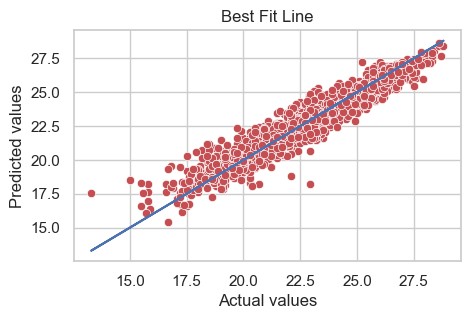

In [71]:
# Comparing actual vaules and predicted vaulues graphically
plt.figure(figsize = (5, 3))
sns.scatterplot(x = y_test, y = pred_values, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Best Fit Line")
plt.show()

## Saving Final Model

In [72]:
# Saving the model 
joblib.dump(final_model, "Next_Day_Minimum_Temperature_Forecast_Model.pkl")

['Next_Day_Minimum_Temperature_Forecast_Model.pkl']

In [73]:
# Loading the saved model
model = joblib.load("Next_Day_Minimum_Temperature_Forecast_Model.pkl")

# Predicting values
predicted_values = model.predict(X_test)

In [74]:
# Saving the actual values
actual_values = np.array(y_test)

In [75]:
# Comparing the actual and predicted values
actual_vs_predicted = pd.DataFrame({'Actual Vlaues' : actual_values , 'Predicted Values' : predicted_values})
actual_vs_predicted

Actual Vlaues  Predicted Values
0         25.900000         25.811000
1         23.500000         23.585552
2         20.700000         20.701000
3         23.000000         22.295667
4         21.200000         21.059333
...             ...               ...
2065      21.700000         20.950333
2066      22.700000         23.346433
2067      24.500000         24.278547
2068      20.800000         21.084000
2069      22.932837         21.943109

[2070 rows x 2 columns]

# Building Next-Day Maximum Temperature Prediction Model
## Features and Target variable for Next-Day Maximum Temperature Prediction:
### Features:
station, Date, Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, lat, lon, DEM, Slope, Solar radiation, Next_Tmin

### Target variable:
Next_Tmax

In [76]:
# Display the dataset
df_max_temp.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

       lat      lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  \
0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1       21.2   
1  37.6046  127.032   44.7624  0.5141      5869.312500       30.5       22.5   
2  37.5776  127.058   33.3068  0.2661      5863.555664       31.1       23.9   
3  37.6450  127.022   45.7160  2.5348      5856.964844       31.7       24.3   
4  37.5507  127.135   35.0380  0.5055      5859.552246       31.2       22.5   

   Year  Month  Day  
0  2013      6   30  
1  2013      6   30  
2  2013      6   30  
3  2013      6   30  
4  2013      6   30  

[5 rows x 27 columns]

# Data Preprocessing

## Checking for the outliers

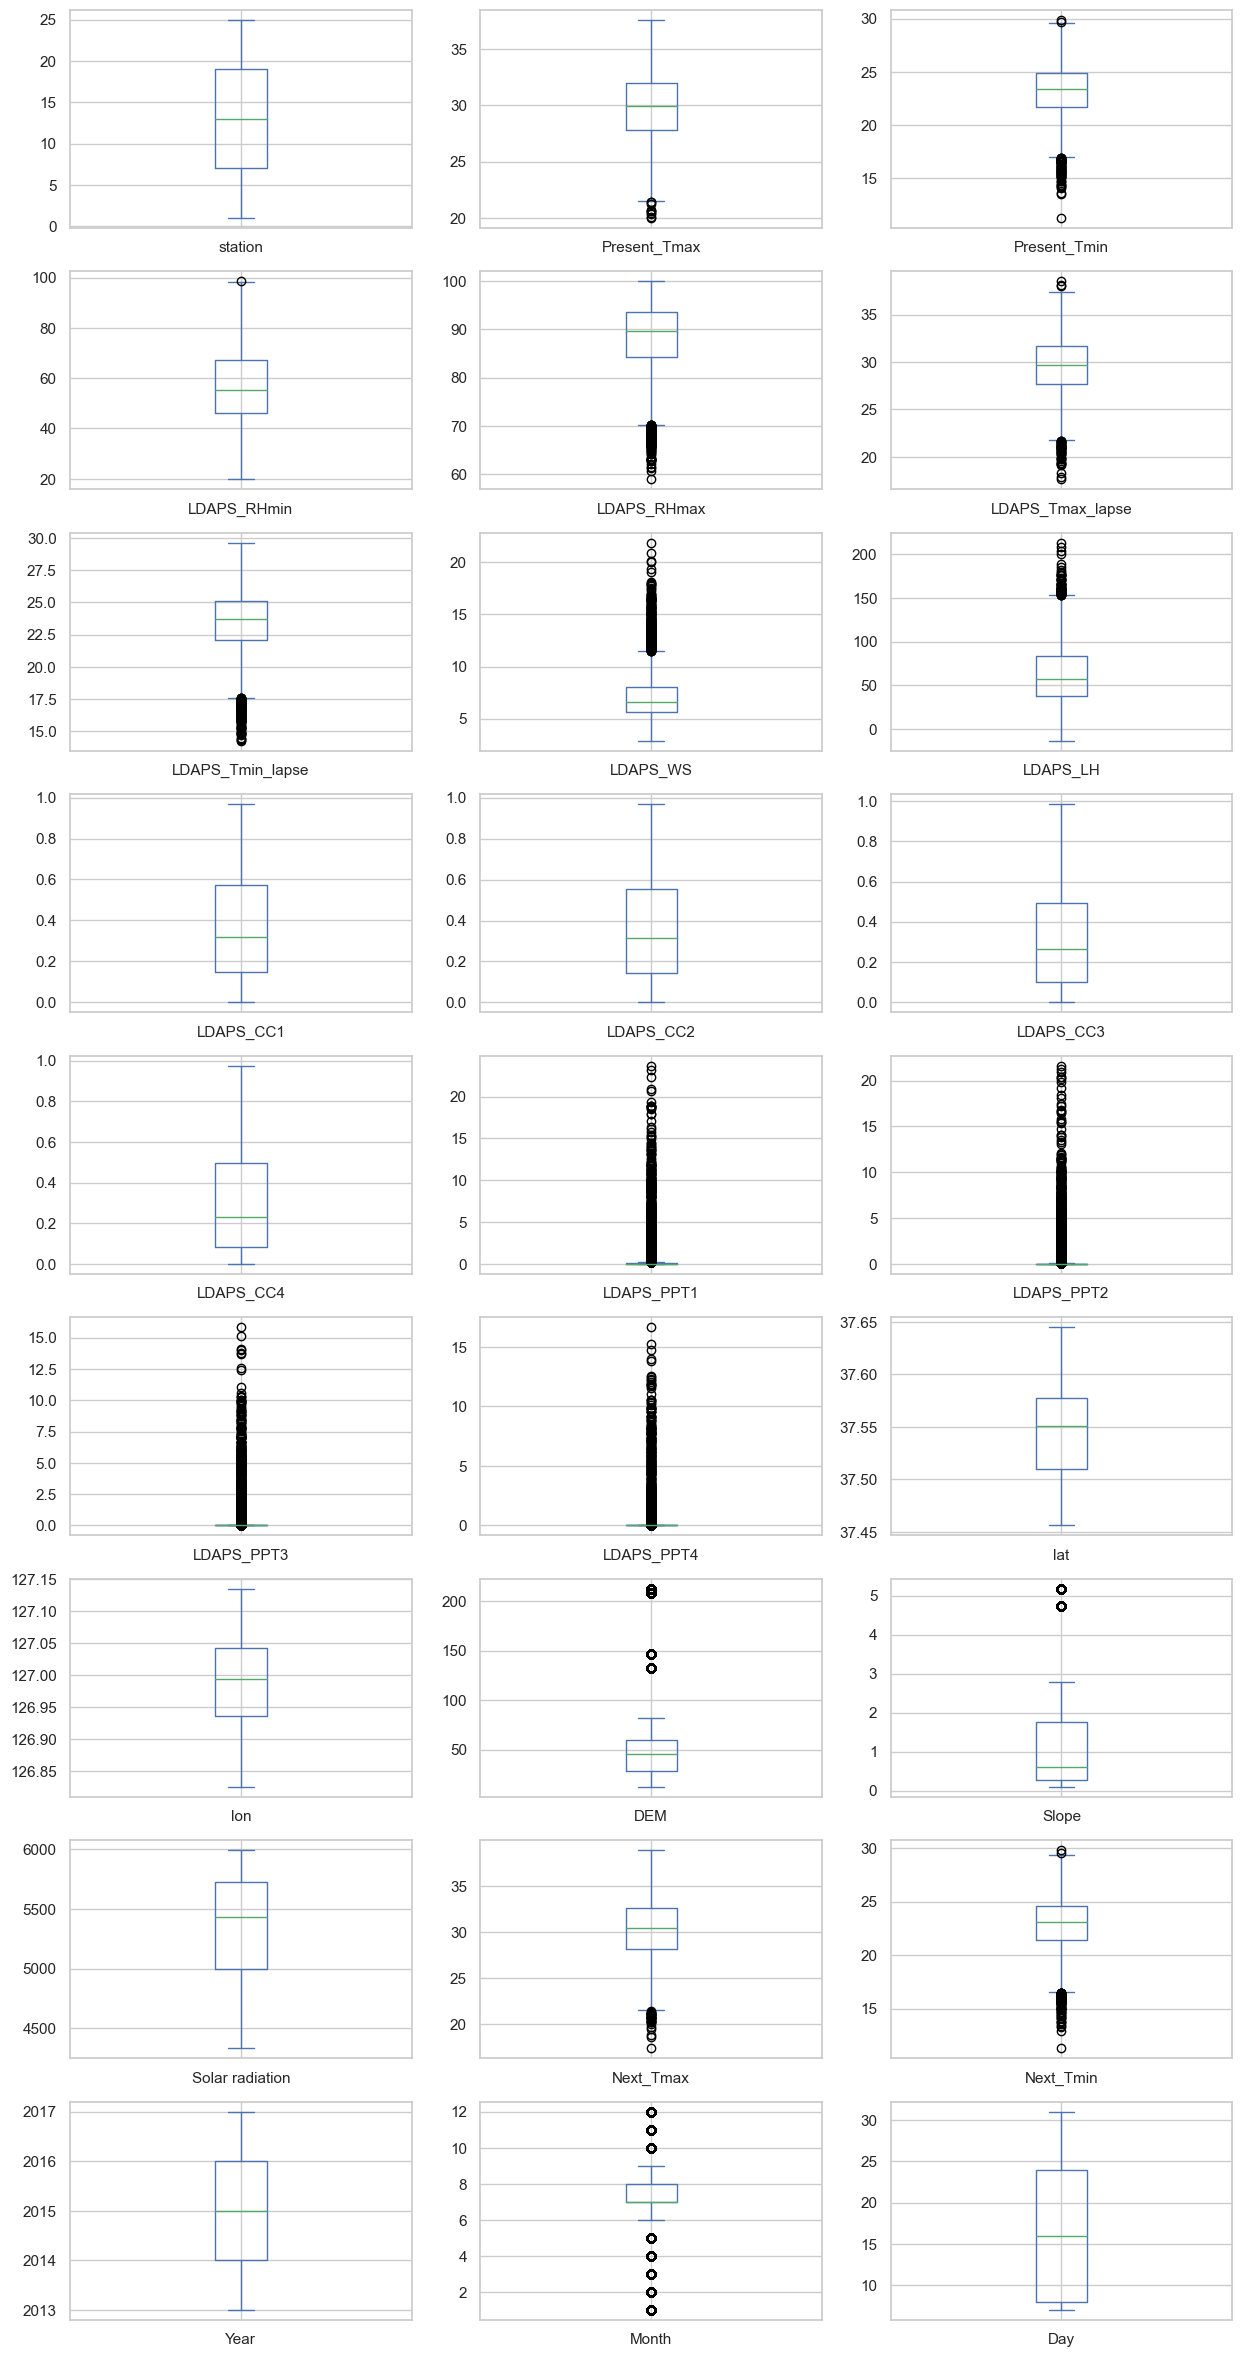

In [77]:
# Checking for the outliers using boxplot
df_max_temp.plot(kind = 'box', subplots = True, figsize = (15, 30), layout = (9, 3))
plt.show()

Outliers are present in 'Present_Tmin', 'Present_Tmax', 'LDAPS_HRmin', 'LDAPS_HRmax', 'LDAPS_Tmin_lapse', 'LDAPS_Tmax_lapse','LDAPH_WS', 'LDAPS_LH', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope', 'Next_Tmax', 'Next_Tmin' and 'Month' columns but 'Next_Tmax' is target variable therefore, it will not be considered for outliers removal.

In [78]:
# List of columns containing outliers
columns_with_outliers = ['Present_Tmin', 'Present_Tmax', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmin_lapse', 'LDAPS_Tmax_lapse',
                         'LDAPS_WS', 'LDAPS_LH', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope', 
                         'Next_Tmin', 'Month']

In [79]:
# Checking for the outliers using Z-Score
z_score = abs(zscore(df_min_temp[columns_with_outliers]))
z_score

Present_Tmin  Present_Tmax  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmin_lapse  \
0         0.761306      0.361783     0.102642     0.383188          0.217125   
1         0.677909      0.721741     0.308235     0.311615          0.223969   
2         0.030964      0.620161     0.553221     0.616004          0.451634   
3         0.072663      0.755601     0.101551     1.134015          0.080155   
4         0.552814      0.552440     0.040088     0.248722          0.011377   
...            ...           ...          ...          ...               ...   
7745      2.262449      2.257951     2.198944     1.415076          2.235344   
7746      2.429243      2.461112     1.828277     0.655672          2.445139   
7747      2.554338      2.190230     2.058222     1.329957          2.032547   
7748      2.304148      2.190230     2.243400     1.550265          2.050636   
7749      2.429243      2.224091     2.319347     1.557432          2.140974   

      LDAPS_Tmax_lapse  LDAPS_WS  LDAPS_LH  LDAPS_PPT1  LDAPS_PPT2  \
0             0.525839  0.128146  0.207570    0.307032    0.277533   
1             0.080884  0.648368  0.315025    0.307032    0.277533   
2             0.163053  0.442340  1.250879    0.307032    0.277533   
3             0.031004  0.667681  0.096433    0.307032    0.277533   
4             0.170725  0.628466  1.356745    0.307032    0.277533   
...                ...       ...       ...         ...         ...   
7745          0.615111  0.227683  1.577874    0.307032    0.277533   
7746          0.993434  0.613197  0.586361    0.307032    0.277533   
7747          1.113927  0.437404  0.285342    0.307032    0.277533   
7748          0.889174  0.255579  0.455145    0.307032    0.277533   
7749          0.571801  0.088979  1.593510    0.307032    0.277533   

      LDAPS_PPT3  LDAPS_PPT4       DEM     Slope  Next_Tmin     Month  
0       0.241726    0.225401  2.773649  1.115761   0.699093  0.482815  
1       0.241726    0.225401  0.315050  0.542139   0.174623  0.482815  
2       0.241726    0.225401  0.526200  0.723195   0.390191  0.482815  
3       0.241726    0.225401  0.297473  0.933099   0.551566  0.482815  
4       0.241726    0.225401  0.494290  0.548418   0.174623  0.482815  
...          ...         ...       ...       ...        ...       ...  
7745    0.241726    0.225401  0.655386  0.499795   2.111129  0.410753  
7746    0.241726    0.225401  0.735219  0.820220   2.353192  0.410753  
7747    0.241726    0.225401  0.852800  0.804013   1.949753  0.410753  
7748    0.241726    0.225401  0.821318  0.755171   1.667346  0.410753  
7749    0.241726    0.225401  0.779131  0.719398   2.232160  0.410753  

[7750 rows x 16 columns]

In [80]:
# # Identify the indices where the z-score is greater than 3
np.where(z_score > 3)

(array([  25,   25,   26, ..., 7743, 7744, 7744], dtype=int64),
 array([6, 9, 9, ..., 0, 0, 4], dtype=int64))

In [81]:
# Removing Outliers
z = 3
updated_df_max_temp = df_max_temp[(z_score < z).all(axis = 1)]
updated_df_max_temp

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233947   
1            29.850689         24.035009  5.691890   51.937448   0.225508   
2            30.091292         24.565633  6.138224   20.573050   0.209344   
3            29.704629         23.326177  5.650050   65.727144   0.216372   
4            29.113934         23.486480  5.735004  107.965535   0.151407   
...                ...               ...       ...         ...        ...   
7745         27.812697         18.303014  6.603253    9.614074   0.052902   
7746         26.704905         17.814038  5.768083   82.146707   0.066461   
7747         26.352081         18.775678  6.148918   72.058294   0.030034   
7748         27.010193         18.733519  6.542819   47.241457   0.035874   
7749         27.939516         18.522965  7.289264    9.090034   0.048954   

      ...      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0     ...  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1     ...  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2     ...  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3     ...  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4     ...  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   
...   ...      ...      ...       ...     ...              ...        ...   
7745  ...  37.5507  127.040   26.2980  0.5721      4456.024414       27.6   
7746  ...  37.5102  127.086   21.9668  0.1332      4441.803711       28.0   
7747  ...  37.5372  126.891   15.5876  0.1554      4443.313965       28.3   
7748  ...  37.5237  126.909   17.2956  0.2223      4438.373535       28.6   
7749  ...  37.5237  126.970   19.5844  0.2713      4451.345215       27.8   

      Next_Tmin  Year  Month  Day  
0          21.2  2013      6   30  
1          22.5  2013      6   30  
2          23.9  2013      6   30  
3          24.3  2013      6   30  
4          22.5  2013      6   30  
...         ...   ...    ...  ...  
7745       17.7  2017      8   30  
7746       17.1  2017      8   30  
7747       18.1  2017      8   30  
7748       18.8  2017      8   30  
7749       17.4  2017      8   30  

[6889 rows x 27 columns]

In [82]:
# Checking the shape of dataframe after removing the outliers
updated_df_max_temp

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233947   
1            29.850689         24.035009  5.691890   51.937448   0.225508   
2            30.091292         24.565633  6.138224   20.573050   0.209344   
3            29.704629         23.326177  5.650050   65.727144   0.216372   
4            29.113934         23.486480  5.735004  107.965535   0.151407   
...                ...               ...       ...         ...        ...   
7745         27.812697         18.303014  6.603253    9.614074   0.052902   
7746         26.704905         17.814038  5.768083   82.146707   0.066461   
7747         26.352081         18.775678  6.148918   72.058294   0.030034   
7748         27.010193         18.733519  6.542819   47.241457   0.035874   
7749         27.939516         18.522965  7.289264    9.090034   0.048954   

      ...      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0     ...  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1     ...  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2     ...  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3     ...  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4     ...  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   
...   ...      ...      ...       ...     ...              ...        ...   
7745  ...  37.5507  127.040   26.2980  0.5721      4456.024414       27.6   
7746  ...  37.5102  127.086   21.9668  0.1332      4441.803711       28.0   
7747  ...  37.5372  126.891   15.5876  0.1554      4443.313965       28.3   
7748  ...  37.5237  126.909   17.2956  0.2223      4438.373535       28.6   
7749  ...  37.5237  126.970   19.5844  0.2713      4451.345215       27.8   

      Next_Tmin  Year  Month  Day  
0          21.2  2013      6   30  
1          22.5  2013      6   30  
2          23.9  2013      6   30  
3          24.3  2013      6   30  
4          22.5  2013      6   30  
...         ...   ...    ...  ...  
7745       17.7  2017      8   30  
7746       17.1  2017      8   30  
7747       18.1  2017      8   30  
7748       18.8  2017      8   30  
7749       17.4  2017      8   30  

[6889 rows x 27 columns]

## Checking for the skewness

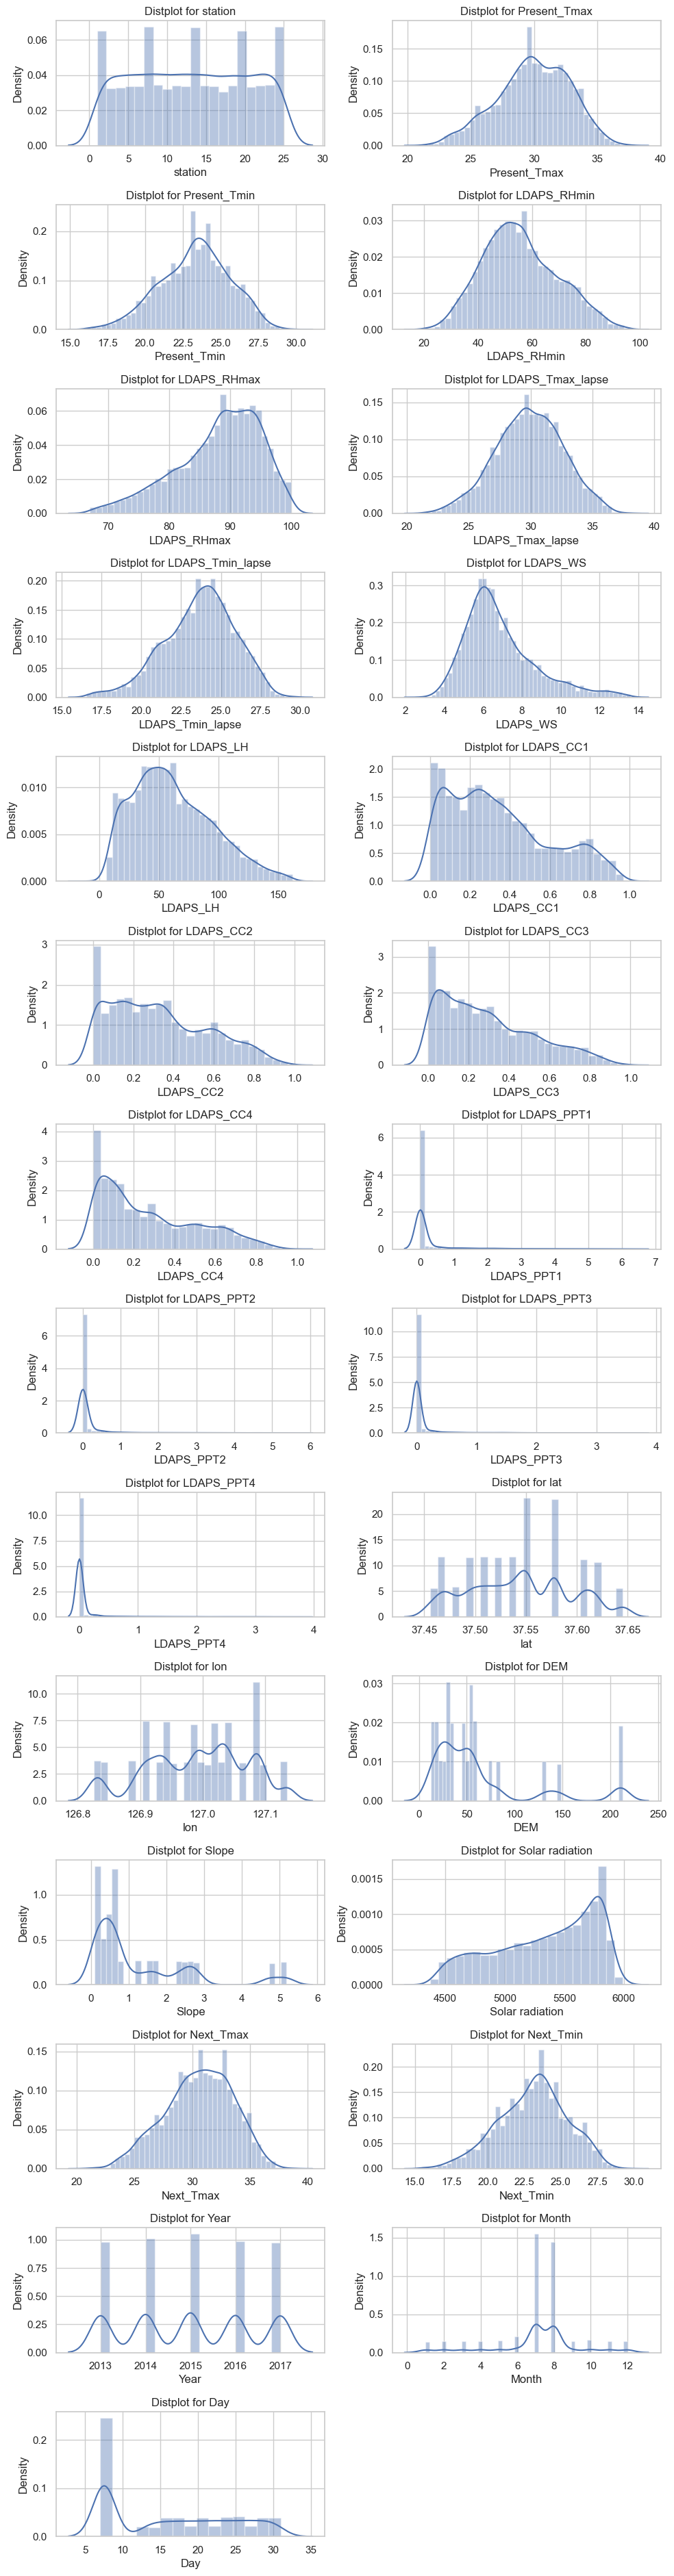

In [83]:
# Checking for the skewness using the distplot
rows = 15
columns = 2
plt.figure(figsize = (10, 40))

columns_to_plot = updated_df_max_temp.columns

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i + 1)
    sns.distplot(updated_df_max_temp[columns_to_plot[i]])
    plt.title("Distplot for " + columns_to_plot[i])
    plt.tight_layout()

plt.show()

### Observations:

#### Columns with Negative Skewness
Present_Tmax, Present_Tmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, Solar radiation, Next_Tmax, Next_Tmin, Month: 

These columns indicating that their distributions are skewed to the left. This suggests that there may be more lower values in the data for these features.

#### Columns with Positive Skewness
LDAPS_WS, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM, Slope:

These columns indicating that their distributions are skewed to the right. This suggests that there may be more higher values in the data for these features.

#### Columns with Skewness Near Zero
station, LDAPS_RHmin, LDAPS_LH, lat, lon, Year, Day: 

These columns have skewness close to zero, indicating relatively balanced distributions without strong skewness in either direction.

In [84]:
# Checking for the skewness using skew() method
updated_df_max_temp.skew()

station             0.002873
Present_Tmax       -0.273915
Present_Tmin       -0.228199
LDAPS_RHmin         0.305128
LDAPS_RHmax        -0.688192
LDAPS_Tmax_lapse   -0.109169
LDAPS_Tmin_lapse   -0.385252
LDAPS_WS            1.088190
LDAPS_LH            0.568672
LDAPS_CC1           0.594923
LDAPS_CC2           0.501582
LDAPS_CC3           0.700349
LDAPS_CC4           0.710561
LDAPS_PPT1          3.723597
LDAPS_PPT2          4.860629
LDAPS_PPT3          5.476518
LDAPS_PPT4          5.926882
lat                 0.107743
lon                -0.275346
DEM                 1.764574
Slope               1.594483
Solar radiation    -0.504715
Next_Tmax          -0.271781
Next_Tmin          -0.241309
Year                0.010947
Month              -0.683459
Day                 0.255054
dtype: float64

Skewness is present in 'LDAPS_WS', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM' and 'Slope' columns.

In [85]:
# List of the columns to be transformed
columns_to_transform = ['LDAPS_WS', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope']

In [86]:
# Copying data
updated_df_max_temp2 = updated_df_max_temp.copy()

# Reduing skewnees using yeojohnson Transformation
for column in columns_to_transform: 
    transformed_data, lambda_value = yeojohnson(updated_df_max_temp[column] + 1)
    updated_df_max_temp2[column] = transformed_data

In [87]:
# Again checking for the skewness
updated_df_max_temp2[columns_to_transform].skew()

LDAPS_WS      0.009550
LDAPS_PPT1    1.610710
LDAPS_PPT2    1.803892
LDAPS_PPT3    0.000000
LDAPS_PPT4    0.000000
DEM           0.042908
Slope         0.305139
dtype: float64

Skewness in every column has been reduced, indicating a more balanced and symmetric distribution of data in each column.

In [88]:
# Display the dataset after updation
updated_df_max_temp2.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  0.903626   69.451805   0.233947  ...   
1         29.850689         24.035009  0.886069   51.937448   0.225508  ...   
2         30.091292         24.565633  0.893596   20.573050   0.209344  ...   
3         29.704629         23.326177  0.885319   65.727144   0.216372  ...   
4         29.113934         23.486480  0.886833  107.965535   0.151407  ...   

       lat      lon       DEM     Slope  Solar radiation  Next_Tmax  \
0  37.6046  126.991  2.704040  0.514269      5992.895996       29.1   
1  37.6046  127.032  2.306198  0.444657      5869.312500       30.5   
2  37.5776  127.058  2.211313  0.423572      5863.555664       31.1   
3  37.6450  127.022  2.312719  0.511075      5856.964844       31.7   
4  37.5507  127.135  2.228034  0.444024      5859.552246       31.2   

   Next_Tmin  Year  Month  Day  
0       21.2  2013      6   30  
1       22.5  2013      6   30  
2       23.9  2013      6   30  
3       24.3  2013      6   30  
4       22.5  2013      6   30  

[5 rows x 27 columns]

## Correlation Coefficient Matrix

In [89]:
# Checking the correalation coefficient matrix
correlation_coefficient = updated_df_max_temp2.corr()
correlation_coefficient

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110298      0.132870    -0.067792   
Present_Tmax      0.110298      1.000000      0.613130    -0.151585   
Present_Tmin      0.132870      0.613130      1.000000     0.150583   
LDAPS_RHmin      -0.067792     -0.151585      0.150583     1.000000   
LDAPS_RHmax      -0.172858     -0.295042     -0.038695     0.552346   
LDAPS_Tmax_lapse  0.066320      0.535222      0.435017    -0.554361   
LDAPS_Tmin_lapse  0.104311      0.610076      0.753316     0.132368   
LDAPS_WS          0.028453     -0.069597      0.037213     0.176365   
LDAPS_LH         -0.136274      0.129343     -0.004496    -0.037257   
LDAPS_CC1         0.009196     -0.286462      0.090222     0.575422   
LDAPS_CC2         0.006498     -0.155675      0.117637     0.714223   
LDAPS_CC3         0.007778     -0.059524      0.042560     0.656195   
LDAPS_CC4         0.011633     -0.049397     -0.006411     0.458222   
LDAPS_PPT1       -0.001347     -0.164218      0.094641     0.401443   
LDAPS_PPT2       -0.006638     -0.072675      0.118054     0.493272   
LDAPS_PPT3       -0.003710     -0.001792      0.067718     0.391103   
LDAPS_PPT4       -0.000307      0.000900     -0.023548     0.233364   
lat              -0.240735     -0.051891     -0.072114     0.089923   
lon              -0.122635      0.011260     -0.043555    -0.094363   
DEM              -0.325366     -0.130659     -0.238197     0.056758   
Slope            -0.143699     -0.092930     -0.155773     0.087123   
Solar radiation  -0.029150     -0.063819      0.012478     0.251290   
Next_Tmax         0.107211      0.586501      0.447524    -0.427584   
Next_Tmin         0.129867      0.617235      0.785652     0.134026   
Year              0.005814      0.103394      0.097636    -0.000147   
Month             0.001876      0.023262     -0.014301    -0.073236   
Day               0.005479     -0.126697     -0.070575    -0.070975   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.172858          0.066320          0.104311  0.028453   
Present_Tmax        -0.295042          0.535222          0.610076 -0.069597   
Present_Tmin        -0.038695          0.435017          0.753316  0.037213   
LDAPS_RHmin          0.552346         -0.554361          0.132368  0.176365   
LDAPS_RHmax          1.000000         -0.386181         -0.140058  0.048059   
LDAPS_Tmax_lapse    -0.386181          1.000000          0.620470 -0.157804   
LDAPS_Tmin_lapse    -0.140058          0.620470          1.000000 -0.012429   
LDAPS_WS             0.048059         -0.157804         -0.012429  1.000000   
LDAPS_LH             0.271530          0.036526         -0.135487 -0.058959   
LDAPS_CC1            0.411015         -0.416365          0.038398  0.207863   
LDAPS_CC2            0.361641         -0.493130          0.102717  0.160067   
LDAPS_CC3            0.170284         -0.501859          0.021586  0.105938   
LDAPS_CC4            0.052922         -0.388254         -0.031530  0.107809   
LDAPS_PPT1           0.384497         -0.298766         -0.042114  0.202884   
LDAPS_PPT2           0.331469         -0.331817          0.033438  0.166256   
LDAPS_PPT3           0.203445         -0.274893         -0.019552  0.099147   
LDAPS_PPT4           0.114760         -0.200687         -0.086917  0.172840   
lat                  0.199460         -0.038463         -0.090139 -0.025100   
lon                  0.016749          0.103168         -0.028932 -0.076015   
DEM                  0.160816         -0.111387         -0.171313  0.113499   
Slope                0.191689         -0.109650         -0.158552  0.095451   
Solar radiation      0.153927          0.013717          0.108654  0.144961   
Next_Tmax           -0.300245          0.805978          0.539217 -0.202124   
Next_Tmin           -0.096430          0.547397          0.867315  0.025447   
Year                -0.140125          0.062975        

Let's use the heatmap to visualize and interpret the correlation coefficient matrix.

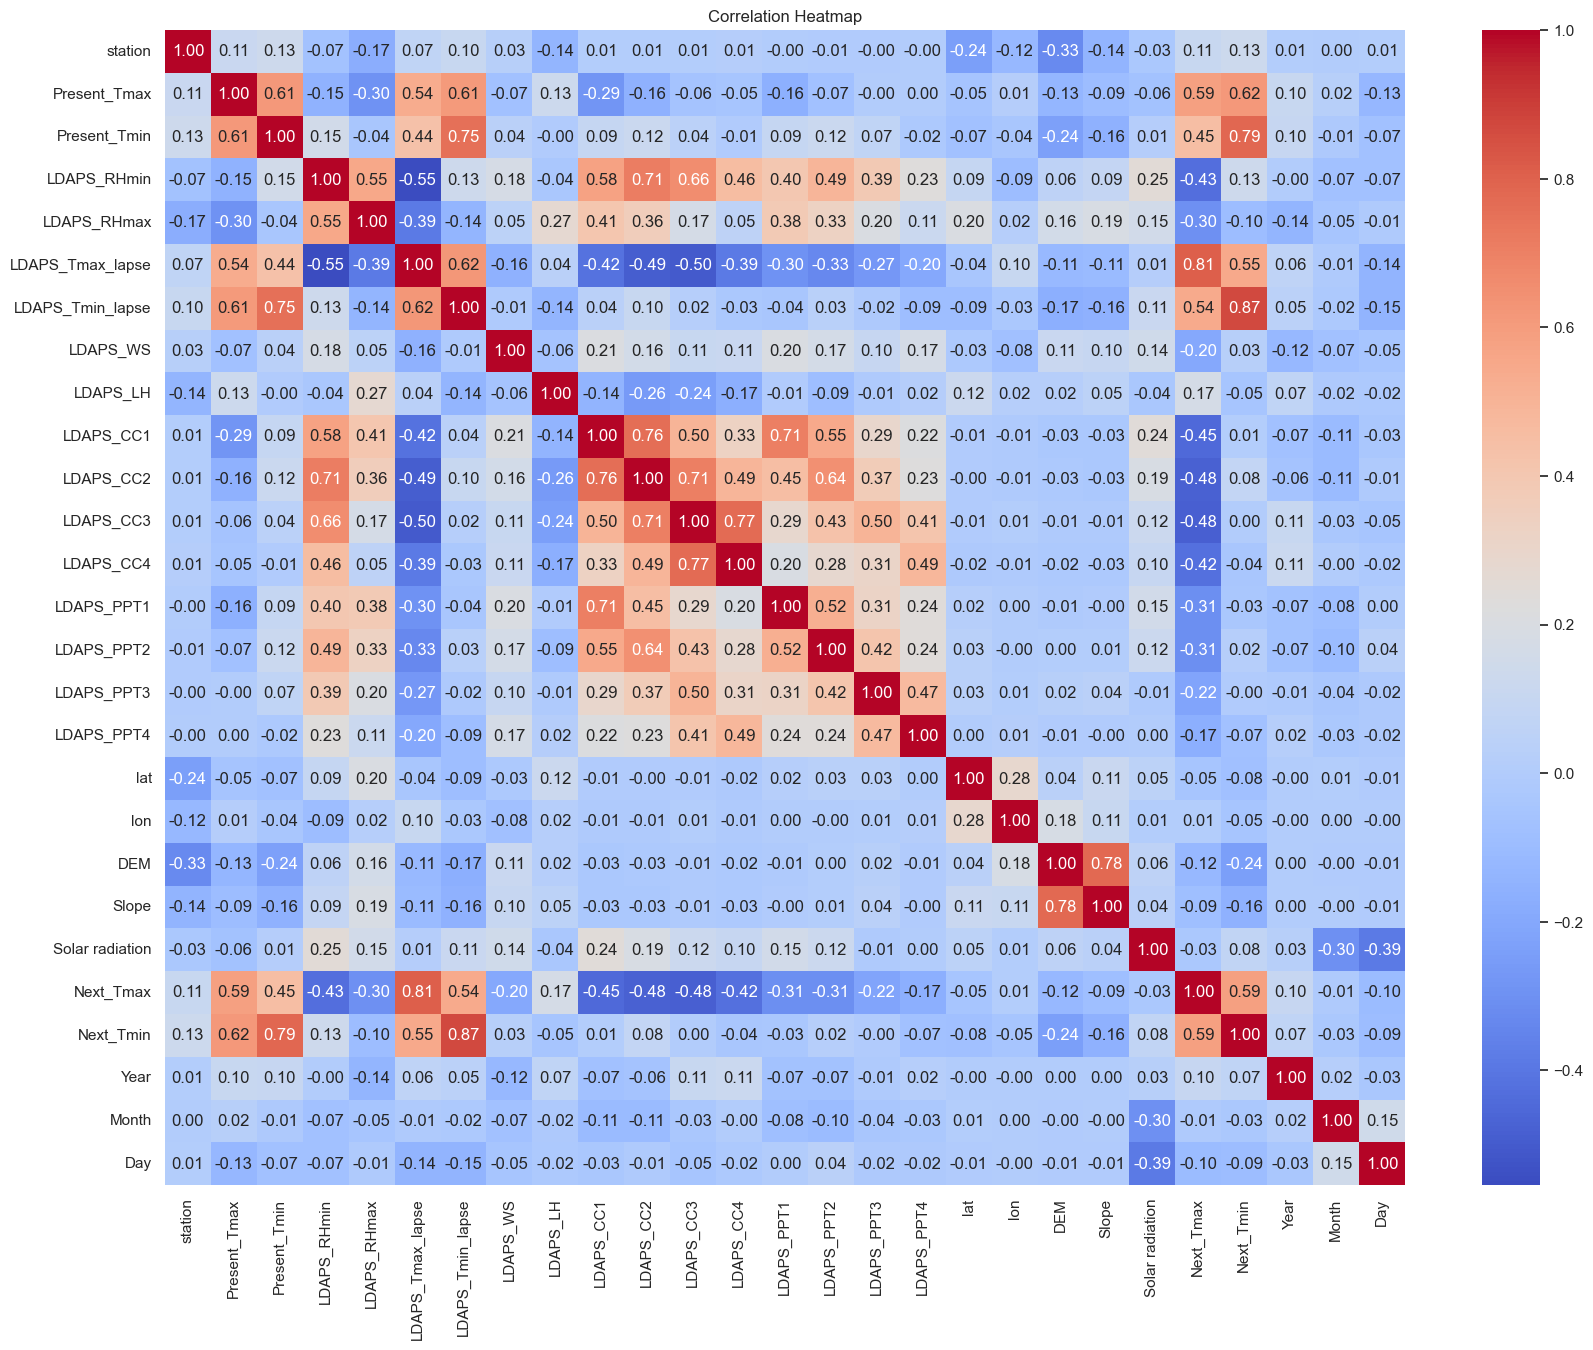

In [90]:
# Plotting the heatmap for correlation coefficient matrix
plt.figure(figsize = (20, 15))
sns.heatmap(correlation_coefficient, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show()

### Observations:
station: This column represents a station identifier. There is no meaningful correlation with other numerical variables, which is expected since it's an identifier.

Present_Tmax: It has positive correlations with several variables, including 'Present_Tmin', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', and 'Next_Tmax'. This suggests that higher present-day maximum temperatures tend to be associated with higher present-day minimum temperatures and other temperature-related variables.

Present_Tmin: It exhibits similar positive correlations to 'Present_Tmax' and other temperature-related variables.

LDAPS_RHmin: This represents the minimum relative humidity. It has a positive correlation with 'LDAPS_RHmax' and 'LDAPS_PPT1' but a negative correlation with some temperature-related variables like 'Present_Tmax' and 'Present_Tmin'. This suggests that higher relative humidity tends to be associated with lower temperatures.

LDAPS_RHmax: Similar to 'LDAPS_RHmin', it has positive correlations with humidity-related variables and negative correlations with temperature-related variables.

LDAPS_Tmax_lapse: This is the temperature variable with lapse rate correction. It has strong positive correlations with other temperature-related variables, suggesting that temperatures at different times of the day are closely related.

LDAPS_Tmin_lapse: Similar to 'LDAPS_Tmax_lapse', it has strong positive correlations with temperature-related variables.

LDAPS_WS: This represents wind speed. It has a positive correlation with 'LDAPS_PPT1' and 'LDAPS_CC1', indicating that higher wind speeds may be associated with more precipitation and cloud cover.

LDAPS_LH: This represents latent heat flux. It has a positive correlation with 'LDAPS_PPT1', indicating that higher latent heat flux may be associated with more precipitation.

LDAPS_CC1: It exhibits positive correlations with other cloud cover variables ('LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4') and some temperature-related variables.

LDAPS_CC2: Similar to 'LDAPS_CC1', positively correlated with other cloud cover variables and some temperature-related variables.

LDAPS_CC3: Positively correlated with other cloud cover variables and some temperature-related variables.

LDAPS_CC4: Positively correlated with other cloud cover variables and some temperature-related variables.

LDAPS_PPT1: Positively correlated with precipitation and some cloud cover variables, indicating that higher precipitation is associated with more cloud cover.

LDAPS_PPT2: Positively correlated with precipitation and cloud cover variables.

LDAPS_PPT3: Positively correlated with precipitation and cloud cover variables.

LDAPS_PPT4: Positively correlated with precipitation and cloud cover variables.

lat: Latitude has negative correlations with some temperature-related variables and 'DEM', suggesting that higher latitudes tend to be associated with lower temperatures and elevations.

lon: Longitude does not exhibit strong correlations with most variables, indicating that it may not have a strong linear relationship with the other weather-related features.

DEM: Digital Elevation Model has negative correlations with temperature-related variables, suggesting that higher elevations are associated with lower temperatures.

Slope: Slope has correlations similar to 'DEM' and exhibits a negative correlation with temperature-related variables.

Solar radiation: It has positive correlations with some temperature-related variables and negative correlations with 'LDAPS_WS', indicating that higher solar radiation is associated with higher temperatures and lower wind speeds.

Next_Tmax: The next-day maximum temperature has strong positive correlations with temperature-related variables like 'Present_Tmax', 'Present_Tmin', 'LDAPS_Tmax_lapse', and 'LDAPS_Tmin_lapse'.

Next_Tmin: Similar to 'Next_Tmax', the next-day minimum temperature has strong positive correlations with temperature-related variables.

Year: The 'Year' variable does not have strong correlations with most other variables, which is expected since it represents a temporal feature.

Month: Similar to 'Year', the 'Month' variable does not have strong correlations with other variables.

Day: The 'Day' variable does not exhibit strong correlations with other variables, as it represents another temporal feature.

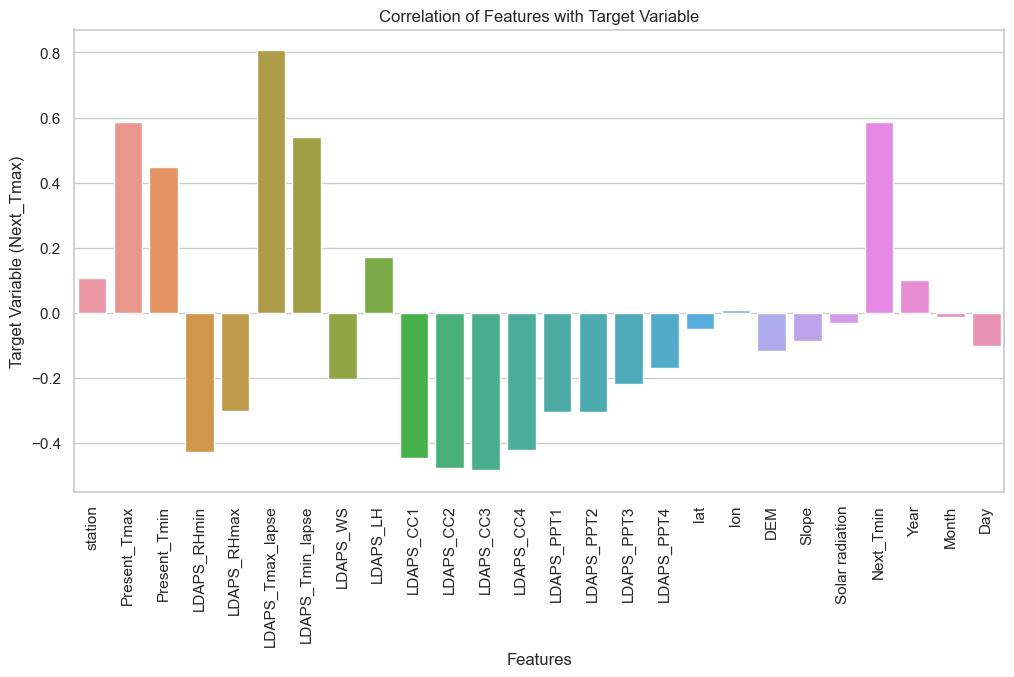

In [91]:
# Checking for the correlation between features and target variable separately
target = 'Next_Tmax'

correlation_matrix = updated_df_max_temp2.corr()
correlations_with_target = correlation_matrix[target].drop(target)

plt.figure(figsize=(12, 6))
sns.barplot(x = correlations_with_target.index, y = correlations_with_target.values)
plt.xlabel('Features')
plt.ylabel('Target Variable (Next_Tmax)')
plt.title('Correlation of Features with Target Variable')
plt.xticks(rotation = 90)

plt.show()

### Observations:
Next_Tmax, representing the next-day maximum temperature, exhibits strong positive correlations with several independent variables, including Present_Tmax, Present_Tmin, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, and Next_Tmin. This suggests that the next-day maximum temperature is closely related to the temperatures on the present day and their variations throughout the day.

Other independent variables, such as humidity-related variables (LDAPS_RHmin and LDAPS_RHmax), cloud cover variables (LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4), precipitation variables (LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4), and geographical variables (lat, lon, DEM, Slope), do not show strong direct correlations with Next_Tmax.

## Feature Engineering

In [92]:
# Extracting features and target from the dataset
features = updated_df_max_temp2.drop(columns = 'Next_Tmax')
target = updated_df_max_temp2['Next_Tmax']

### Feature Scaling

In [93]:
# Performing standard scaling on the features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(features)

In [94]:
# Creating a DataFrame 'updated_features' to store the scaled data using 'scaled_df'
updated_features = pd.DataFrame(scaled_df, columns = features.columns[:])
updated_features.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0 -1.671180     -0.433907     -0.827359     0.192557     0.437367   
1 -1.532314      0.687359     -0.740732    -0.241278     0.363305   
2 -1.393449      0.582240     -0.004404    -0.499953    -0.596579   
3 -1.254584      0.722399      0.038909     0.191406     1.214310   
4 -1.115719      0.512161     -0.610792     0.041852     0.298225   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0         -0.662634         -0.290506  0.171754  0.225063  -0.444611  ...   
1         -0.012851          0.173280 -0.585853 -0.301847  -0.478319  ...   
2          0.075149          0.412656 -0.261048 -1.245429  -0.542883  ...   
3         -0.066272         -0.146490 -0.618218  0.113009  -0.514811  ...   
4         -0.282318         -0.074174 -0.552864  1.383729  -0.774291  ...   

   LDAPS_PPT4       lat       lon       DEM     Slope  Solar radiation  \
0   -0.421328  1.214803  0.002446  1.852657  1.358733         1.552209   
1   -0.421328  1.214803  0.516974  0.069569 -0.409163         1.258080   
2   -0.421328  0.674008  0.843260 -0.355700 -0.944642         1.244378   
3   -0.421328  2.023992  0.391479  0.098793  1.277610         1.228692   
4   -0.421328  0.135217  1.809567 -0.280758 -0.425252         1.234850   

   Next_Tmin      Year     Month       Day  
0  -0.800113 -1.423485 -0.487646  1.662518  
1  -0.248122 -1.423485 -0.487646  1.662518  
2   0.346330 -1.423485 -0.487646  1.662518  
3   0.516173 -1.423485 -0.487646  1.662518  
4  -0.248122 -1.423485 -0.487646  1.662518  

[5 rows x 26 columns]

## Checking for the Variance Inflation Factor

In [95]:
# Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data["Features"] = updated_features.columns
vif_data["VIF"] = [variance_inflation_factor(updated_features.values, i) for i in range(updated_features.shape[1])]

# Print the VIF data
print(vif_data)

            Features       VIF
0            station  1.291044
1       Present_Tmax  2.813782
2       Present_Tmin  3.355561
3        LDAPS_RHmin  5.968396
4        LDAPS_RHmax  2.294272
5   LDAPS_Tmax_lapse  6.901946
6   LDAPS_Tmin_lapse  8.309136
7           LDAPS_WS  1.198573
8           LDAPS_LH  1.555348
9          LDAPS_CC1  4.639647
10         LDAPS_CC2  5.475986
11         LDAPS_CC3  5.236084
12         LDAPS_CC4  2.959990
13        LDAPS_PPT1  2.538195
14        LDAPS_PPT2  2.116837
15        LDAPS_PPT3  1.766060
16        LDAPS_PPT4  1.691638
17               lat  1.275160
18               lon  1.225156
19               DEM  3.338685
20             Slope  2.841173
21   Solar radiation  1.503814
22         Next_Tmin  5.379469
23              Year  1.137885
24             Month  1.127906
25               Day  1.263920


The VIF values for all the features fall within a certain range.

In [96]:
# Storing features and target in X and y
X = updated_features
y = target

## Finding the best random state

In [97]:
# Function to find the best random state
def find_best_random_state(X, y, iterations = 200):
    max_r2_score = 0
    max_random_state = 0

    for i in range(1, iterations + 1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=i)
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        pred = lr.predict(X_test)
        r2score = r2_score(y_test, pred)

        if r2score > max_r2_score:
            max_r2_score = r2score
            max_random_state = i

    return max_r2_score, max_random_state

# Calling the function to find the best random state
best_r2_score, best_random_state = find_best_random_state(X, y)

print("Best R2 score is", best_r2_score, "at random state", best_random_state)

Best R2 score is 0.7954344794704944 at random state 61


## Splitting the dataset into training and testing sets

In [98]:
# Splitting the dataset for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = best_random_state)

## Different Models for predicting Next-Day Maximum Temperature

In [99]:
# List of names of the models
models_name = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'ElasticNet Regression', 'K-Nearest Neighbors', 
               'Support Vector Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 'Extra Trees Regressor', 
               'Gradient Boosting Regressor', 'AdaBoost Regressor', 'Bagging Regressor', 'XGBoost Regressor']

In [100]:
# List of machine learning models
models = [LinearRegression(), 
          Lasso(), 
          Ridge(), 
          ElasticNet(), 
          KNeighborsRegressor(), 
          SVR(), 
          DecisionTreeRegressor(),
          RandomForestRegressor(), 
          ExtraTreesRegressor(), 
          GradientBoostingRegressor(), 
          AdaBoostRegressor(), 
          BaggingRegressor(),
          xgb.XGBRegressor()]

In [101]:
models_r2_score = [] # List for storing the models R2 score
models_mae = []      # List for storing the models Mean Absolute Error 
models_mse = []      # List for storing the models Mean Squared Error
models_rmse = []     # List for storing the models Root Mean Squred Error
i = 0
for model in models:
    
    print(models_name[i])
    
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)
    
    r2score = r2_score(y_test,pred_y)*100
    models_r2_score.append(r2score)
    
    mae = mean_absolute_error(y_test,pred_y)
    models_mae.append(mae)
    
    mse = mean_squared_error(y_test,pred_y)
    models_mse.append(mse)
    
    rmse = np.sqrt(mean_squared_error(y_test,pred_y))
    models_rmse.append(rmse)
    
    print("R2 score:", r2score)
    print("Mean Absolute Error:", mae)
    print("Mean Square Error:", mse)
    print("Root Mean Square Error:", rmse)
    print('\n')
    i += 1

Linear Regression
R2 score: 79.54344794704944
Mean Absolute Error: 1.014160122545363
Mean Square Error: 1.7530857774574518
Root Mean Square Error: 1.3240414560947296


Lasso Regression
R2 score: 53.30536356198685
Mean Absolute Error: 1.5967016968274887
Mean Square Error: 4.00163736347838
Root Mean Square Error: 2.00040929898818


Ridge Regression
R2 score: 79.54326489589599
Mean Absolute Error: 1.0141466497614906
Mean Square Error: 1.7531014645768066
Root Mean Square Error: 1.3240473800347201


ElasticNet Regression
R2 score: 63.74265113130965
Mean Absolute Error: 1.4088062126963188
Mean Square Error: 3.1071826017154316
Root Mean Square Error: 1.7627202278624454


K-Nearest Neighbors
R2 score: 87.83033018070113
Mean Absolute Error: 0.766838286306818
Mean Square Error: 1.0429164710329994
Root Mean Square Error: 1.021232819210683


Support Vector Regressor
R2 score: 89.97467805103567
Mean Absolute Error: 0.6812442309678088
Mean Square Error: 0.8591501284121046
Root Mean Square Error: 0.9

Linear Regression:
R2 score of 79.54%, indicating a good fit to the data. Low Mean Absolute Error (1.01), Mean Square Error (1.75), and Root Mean Square Error (1.32), suggesting relatively small prediction errors.

Lasso Regression:
R2 score of 53.31%, indicating moderate performance. Mean Absolute Error (1.60), Mean Square Error (4.00), and Root Mean Square Error (2.00) are higher compared to Linear Regression, suggesting larger prediction errors.

Ridge Regression:
R2 score of 79.54%, similar to Linear Regression. Mean Absolute Error (1.01), Mean Square Error (1.75), and Root Mean Square Error (1.32) are also close, indicating a comparable performance.

ElasticNet Regression:
R2 score of 63.74%, indicating decent performance. Mean Absolute Error (1.41), Mean Square Error (3.11), and Root Mean Square Error (1.76) are somewhat higher than Linear Regression.

K-Nearest Neighbors:
R2 score of 87.83%, suggesting a good fit to the data. Low Mean Absolute Error (0.77), Mean Square Error (1.04), and Root Mean Square Error (1.02), indicating relatively small prediction errors.

Support Vector Regressor:
R2 score of 89.97%, indicating excellent performance. Very low Mean Absolute Error (0.68), Mean Square Error (0.86), and Root Mean Square Error (0.93), suggesting very small prediction errors.

Decision Tree Regressor:
R2 score of 76.51%, indicating reasonable performance. Mean Absolute Error (1.02), Mean Square Error (2.07), and Root Mean Square Error (1.44) are moderate.

Random Forest Regressor:
R2 score of 89.82%, indicating excellent performance. Low Mean Absolute Error (0.69), Mean Square Error (0.87), and Root Mean Square Error (0.93), suggesting relatively small prediction errors.

Extra Trees Regressor:
R2 score of 92.25%, indicating excellent performance. Very low Mean Absolute Error (0.61), Mean Square Error (0.67), and Root Mean Square Error (0.82), suggesting very small prediction errors.

Gradient Boosting Regressor:
R2 score of 86.19%, indicating strong performance. Mean Absolute Error (0.84), Mean Square Error (1.18), and Root Mean Square Error (1.09) are relatively low.

AdaBoost Regressor:
R2 score of 77.39%, indicating decent performance. Mean Absolute Error (1.14), Mean Square Error (1.99), and Root Mean Square Error (1.41) are moderate.

Bagging Regressor:
R2 score of 88.19%, indicating strong performance. Mean Absolute Error (0.75), Mean Square Error (1.03), and Root Mean Square Error (1.02) are relatively low.

XGBoost Regressor:
R2 score of 91.62%, indicating excellent performance. Very low Mean Absolute Error (0.63), Mean Square Error (0.72), and Root Mean Square Error (0.85), suggesting very small prediction errors.

## Cross Validation

In [102]:
i = 0
diff_r2_cv = []
cv_mean = []
for model in models:
    print(models_name[i])
    print("R2 Score:", models_r2_score[i])
    cv_score = cross_val_score(model, X, y)
    print("Cross Validation Scores:", cv_score*100)
    cv_mean.append(cv_score.mean()*100)
    print("Mean of Cross Validation Scores:", cv_score.mean()*100)
    diff = models_r2_score[i] - cv_score.mean()*100
    print("Difference between R2 Score and Cross Validation score:", diff)
    diff_r2_cv.append(diff)
    print('\n')
    i += 1

Linear Regression
R2 Score: 79.54344794704944
Cross Validation Scores: [72.88943167 64.86008842 68.8079015  75.00123292 59.4076924 ]
Mean of Cross Validation Scores: 68.1932693812682
Difference between R2 Score and Cross Validation score: 11.350178565781249


Lasso Regression
R2 Score: 53.30536356198685
Cross Validation Scores: [46.48309901 46.39225533 56.00014897 36.80422105 52.08513737]
Mean of Cross Validation Scores: 47.55297234698738
Difference between R2 Score and Cross Validation score: 5.75239121499947


Ridge Regression
R2 Score: 79.54326489589599
Cross Validation Scores: [72.90399396 64.86257978 68.80348698 75.00585454 59.4147307 ]
Mean of Cross Validation Scores: 68.1981291915958
Difference between R2 Score and Cross Validation score: 11.34513570430019


ElasticNet Regression
R2 Score: 63.74265113130965
Cross Validation Scores: [56.13656953 53.33756311 60.33888012 49.47324687 58.23925514]
Mean of Cross Validation Scores: 55.50510295289979
Difference between R2 Score and Cros

Extra Trees Regressor: Achieved an R2 score of 92.25%, indicating strong 9accuracy and good stability, with a slightly higher difference of 23.89% from cross-validation R2 scores.

XGBoost Regressor: Attained an R2 score of 91.62%, demonstrating exceptional performance in fitting the training data. It has a relatively small difference of 25.57% from the mean cross-validation R2 scores, indicating both accuracy and stability.

Support Vector Regressor: Scored an R2 score of 89.97%, showcasing strong predictive performance and a small difference of 23.24% from cross-validation R2 scores, ensuring high accuracy and stability.

Random Forest Regressor: Achieved an R2 score of 89.8%, demonstrating solid predictive accuracy and a moderate difference of 22.19% from cross-validation R2 scores, indicating good stability.

Bagging Regressor: Achieved an R2 score of 88.94%, indicating good predictive accuracy and reasonable stability, with a difference of 22.74% from cross-validation R2 scores.

K-Nearest Neighbors: Scored an R2 score of 87.83%, showing good predictive accuracy but slightly lower stability with a 35.58% difference from cross-validation R2 scores.

Gradient Boosting Regressor: Attained an R2 score of 86.19%, striking a balance between accuracy and stability, with a difference of 16.03% from cross-validation R2 scores.

Linear Regression: Achieved an R2 score of 79.54%, demonstrating solid performance with high stability, as indicated by the very small difference of 11.35% from cross-validation R2 scores.

Ridge Regression: Also attained an R2 score of 79.54%, showing strong performance with high stability, similar to Linear Regression.

Decision Tree Regressor: Scored an R2 score of 76.51%, indicating decent predictive performance with reasonable stability, as shown by a difference of 36.60% from cross-validation R2 scores.

ElasticNet Regression: Achieved an R2 score of 63.74%, indicating a balance between accuracy and stability, with a difference of 8.24% from cross-validation R2 scores.

Lasso Regression: Scored the lowest R2 score of 53.31%, suggesting potential overfitting due to a higher difference of 5.75% from cross-validation R2 scores.

In [103]:
# Storing the performance summary of all the models
models_performance = pd.DataFrame({'Model': models_name, 
                                   'R2 Score': models_r2_score,
                                   'MAE': models_mae,
                                   'MSE': models_mse,
                                   'RMSE': models_rmse,
                                   'CV Score Mean': cv_mean,
                                   'Difference: R2 Score & CV Score': diff_r2_cv})

In [104]:
models_performance

Model   R2 Score       MAE       MSE      RMSE  \
0             Linear Regression  79.543448  1.014160  1.753086  1.324041   
1              Lasso Regression  53.305364  1.596702  4.001637  2.000409   
2              Ridge Regression  79.543265  1.014147  1.753101  1.324047   
3         ElasticNet Regression  63.742651  1.408806  3.107183  1.762720   
4           K-Nearest Neighbors  87.830330  0.766838  1.042916  1.021233   
5      Support Vector Regressor  89.974678  0.681244  0.859150  0.926904   
6       Decision Tree Regressor  76.513246  1.012845  2.012768  1.418721   
7       Random Forest Regressor  89.822003  0.694730  0.872234  0.933935   
8         Extra Trees Regressor  92.250273  0.609270  0.664136  0.814945   
9   Gradient Boosting Regressor  86.189404  0.837029  1.183541  1.087907   
10           AdaBoost Regressor  77.389176  1.125643  1.937703  1.392014   
11            Bagging Regressor  88.190859  0.753667  1.012020  1.005992   
12            XGBoost Regressor  91.622207  0.630972  0.717960  0.847325   

    CV Score Mean  Difference: R2 Score & CV Score  
0       68.193269                        11.350179  
1       47.552972                         5.752391  
2       68.198129                        11.345136  
3       55.505103                         8.237548  
4       52.252893                        35.577437  
5       66.736489                        23.238189  
6       39.914453                        36.598793  
7       67.627069                        22.194935  
8       68.361569                        23.888704  
9       70.158052                        16.031352  
10      63.913563                        13.475613  
11      65.441798                        22.749061  
12      66.048255                        25.573952

## Final Model
After careful evaluation, the Extra Trees Regressor emerges as the best model. With an R2 score of 92.25%, the the Extra Trees Regressor exhibits strong performance in fitting the training data. Additionally, the difference between the R2 score and the mean of cross-validation scores is relatively small at 23.89%, suggesting that the model maintains stability and accuracy. This balance between accuracy and stability makes the Extra Trees Regressor a prudent choice for the final model.

## Hyper Parameter Tuning

In [105]:
# Parameters grid for hyper parameter tuning
parameters_grid = {
    'n_estimators': [100, 200, 300],  # Number of decision trees in the ensemble
    'max_depth': [10, 20, 30],        # Maximum depth of each decision tree (or None for unlimited depth)
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

In [106]:
# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(ExtraTreesRegressor(), param_grid = parameters_grid, cv = 5, scoring = 'r2')

In [107]:
# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [108]:
# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [109]:
# Storing the best parameters
best_params = grid_search_cv.best_params_

In [110]:
# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

0.9172174540069424

In [111]:
# Creating final model
final_model = ExtraTreesRegressor(**best_params)
final_model.fit(X_train, y_train)
pred_values = final_model.predict(X_test)
r2score = r2_score(y_test, pred_values)
print(r2score * 100)

92.36162993835137


#### Final model has achieved an accuracy rate of 92.36%.

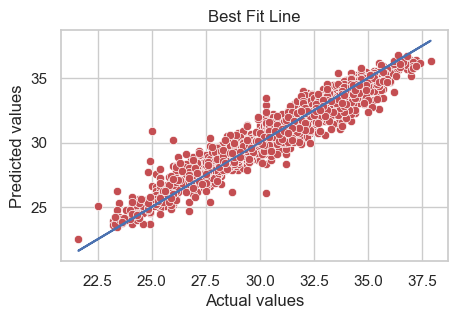

In [112]:
# Comparing actual vaules and predicted vaulues graphically
plt.figure(figsize = (5, 3))
sns.scatterplot(x = y_test, y = pred_values, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Best Fit Line")
plt.show()

## Saving Final Model

In [113]:
# Saving the model 
joblib.dump(final_model, "Next_Day_Maximum_Temperature_Forecast_Model.pkl")

['Next_Day_Maximum_Temperature_Forecast_Model.pkl']

In [114]:
# Loading the saved model
model = joblib.load("Next_Day_Maximum_Temperature_Forecast_Model.pkl")

# Predicting values
predicted_values = model.predict(X_test)

In [115]:
# Saving the actual values
actual_values = np.array(y_test)

In [116]:
# Comparing the actual and predicted values
actual_vs_predicted = pd.DataFrame({'Actual Vlaues' : actual_values , 'Predicted Values' : predicted_values})
actual_vs_predicted

Actual Vlaues  Predicted Values
0              30.4         30.112421
1              33.7         33.730667
2              34.9         34.733333
3              34.7         34.776333
4              28.0         28.788500
...             ...               ...
2062           29.9         30.128918
2063           32.8         32.528000
2064           30.5         29.373000
2065           31.3         30.738842
2066           26.9         26.441000

[2067 rows x 2 columns]

# Temperature Forecast Project Documentation
## Project Overview


### Objective
The Temerature Forecast Project focuses on two primary objectives.

#### Objective-1
The first objective of this project is to predict the minimum temperature for the next day using a regression model. This prediction will be based on the details provided in the dataset. The aim is to accurately forecast the minimum temperature for the upcoming day, contributing to a better understanding of temperature patterns.

#### Objective-2
The second objective of this project is to predict the maximum temperature for the next day using another regression model. Similar to the first objective, this prediction will also be based on the dataset's information. The goal is to provide an accurate forecast of the maximum temperature for the following day, allowing for a comprehensive analysis of temperature trends.

### Data Source
The dataset used for this Temperature Forecast project is taken from a CSV file, containing information about temperature records, dates, regions, and related factors

### Data Preprocessing
#### Data Cleaning
Data cleaning was performed to handle missing values, ensuring the dataset's completeness.
Outliers, if present, were identified and addressed appropriately.

#### Feature Engineering
Relevant features were selected or created to enhance models performance.
Feature extraction and transformation techniques, such as encoding categorical variables, were applied as needed.

### Data Splitting
The dataset was divided into training and testing sets to evaluate models performance. The typical split is 70% for training and 30% for testing in both the models.

### Feature Scaling
Features were scaled or normalized to ensure that models are not biased by variables with larger scales.

### Models Employed
#### Model Selection
Several machine learning models were employed to predict Next_Day Minimum and Maximum Temperature:

Including Linear Regression, Lasso Regression, Ridge Regression, ElasticNet Regression, K-Nearest Neighbors, Support Vector Regressor, Decision Tree Regressor, Random Forest Regressor, Extra Trees Regressor, Gradient Boosting Regressor, AdaBoost Regressor, Bagging Regressor, XGBoost Regressor.

Each model mentioned above was trained on the training dataset.

### Model Evaluation and Hyperparameter Tuning
#### Model Evaluation Metrics
The following evaluation metrics were used to assess model performance:

Mean Absolute Error (MAE): Measures the average absolute difference between predicted and actual values.

Mean Squared Error (MSE): Provides a measure of the squared error between predicted and actual values.

Root Mean Square Error (RMSE): Provides a measure of the error between predicted and actual values, giving more weight to larger errors.

R-squared (R2): Indicates the proportion of variance in the dependent variable that is predictable from the independent variables.

#### Model Comparison
The performance of each model was compared based on the evaluation metrics mentioned above in case of both the models.

#### Hyperparameter Tuning
Hyperparameter tuning techniques, such as grid search, was employed to optimize models performance.

### Results
#### Final Model Selection
####  In case of  Next-Day Minimum Temperature  forecasting model
After careful evaluation, the Extra Trees Regressor model was selected as the final model for for predicting next day minimum temperature, primarily due to its outstanding performance.

####  In case of  Next-Day Maximum Temperature forecasting model
After careful evaluation, the Extra Trees Regressor model was selected as the final model for predicting next day maximum temperature, owing to its exceptional performance in the context of avocado price forecasting.

### Key Findings
#### In case of  Next-Day Minimum Temperature  forecasting model
Temperature Influence: Next-day minimum temperature (Next_Tmin) is significantly influenced by present-day maximum temperature (Present_Tmax) and present-day minimum temperature (Present_Tmin). Higher present-day temperatures are associated with higher next-day minimum temperatures.

Temperature Variations: The temperature variables with lapse rate correction, LDAPS_Tmax_lapse, and LDAPS_Tmin_lapse, also have a strong impact on Next_Tmin. This suggests that variations in temperature throughout the day are important predictors of the next-day minimum temperature.

Humidity and Temperature: There is a negative correlation between minimum relative humidity (LDAPS_RHmin) and Next_Tmin, implying that higher humidity tends to be associated with higher minimum temperatures. In contrast, maximum relative humidity (LDAPS_RHmax) shows positive correlations with humidity-related variables but weaker correlations with Next_Tmin.

Cloud Cover and Precipitation: Cloud cover variables (LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4) and precipitation variables (LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4) do not exhibit strong direct correlations with Next_Tmin. However, they may indirectly influence it through their relationships with temperature and humidity.

Geographical Factors: Geographical variables like latitude (lat), digital elevation model (DEM), and slope do not show strong direct correlations with Next_Tmin. However, they may have indirect effects on minimum temperatures through their impact on local climate patterns.

Solar Radiation: Solar radiation shows weak correlations with Next_Tmin, suggesting that it has a limited direct influence on next-day minimum temperatures.

Temporal Features: Year, Month, and Day, representing temporal features, do not exhibit strong correlations with Next_Tmin, indicating that they may not have a direct linear relationship with the dependent variable.

#### In case of  Next-Day Maximum Temperature  forecasting model
Temperature Influence: Next-day maximum temperature (Next_Tmax) is significantly influenced by present-day maximum temperature (Present_Tmax) and present-day minimum temperature (Present_Tmin). Higher present-day temperatures are associated with higher next-day maximum temperatures.

Temperature Variations: The temperature variables with lapse rate correction, LDAPS_Tmax_lapse, and LDAPS_Tmin_lapse, also have a strong impact on Next_Tmax. This suggests that variations in temperature throughout the day are important predictors of the next-day maximum temperature.

Humidity and Temperature: Minimum relative humidity (LDAPS_RHmin) exhibits a negative correlation with Next_Tmax, implying that higher humidity tends to be associated with lower maximum temperatures. Maximum relative humidity (LDAPS_RHmax) shows positive correlations with humidity-related variables but weaker correlations with Next_Tmax.

Cloud Cover and Precipitation: Cloud cover variables (LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4) and precipitation variables (LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4) do not exhibit strong direct correlations with Next_Tmax. However, they may indirectly influence it through their relationships with temperature and humidity.

Geographical Factors: Geographical variables like latitude (lat), digital elevation model (DEM), and slope (Slope) do not show strong direct correlations with Next_Tmax. However, they may have indirect effects on maximum temperatures through their impact on local climate patterns.

Solar Radiation: Solar radiation shows weak correlations with Next_Tmax, suggesting that it has a limited direct influence on next-day maximum temperatures.

Temporal Features: Year, Month, and Day, representing temporal features, do not exhibit strong correlations with Next_Tmax, indicating that they may not have a direct linear relationship with the dependent variable.


### Conclusion
In conclusion, the Temperature Forecast Project is dedicated to enhance understanding of temperature patterns and predictions through the application of advanced machine learning techniques. Through the analysis of comprehensive data and the deployment of predictive models, this project empowers stakeholders across various sectors to access valuable insights for informed decision-making. These insights have the potential to revolutionize temperature-sensitive industries by enabling optimized resource management, improved planning, and more effective responses to temperature variations, ultimately fostering more efficient and informed decision-making.